In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [13]:
df = pd.read_csv(r"C:\Users\PERSONAL\Desktop\Python\my_projects\ds_projs\python\Covid_19_data.csv")

## Data Cleaning

In [16]:
df

SNo ObservationDate     Province/State  Country/Region  \
0            1      01/22/2020              Anhui  Mainland China   
1            2      01/22/2020            Beijing  Mainland China   
2            3      01/22/2020          Chongqing  Mainland China   
3            4      01/22/2020             Fujian  Mainland China   
4            5      01/22/2020              Gansu  Mainland China   
...        ...             ...                ...             ...   
306424  306425      05/29/2021  Zaporizhia Oblast         Ukraine   
306425  306426      05/29/2021            Zeeland     Netherlands   
306426  306427      05/29/2021           Zhejiang  Mainland China   
306427  306428      05/29/2021    Zhytomyr Oblast         Ukraine   
306428  306429      05/29/2021       Zuid-Holland     Netherlands   

            Last Update  Confirmed  Deaths  Recovered  
0       1/22/2020 17:00          1       0          0  
1       1/22/2020 17:00         14       0          0  
2       1/22/2020 17:00          6       0          0  
3       1/22/2020 17:00          1       0          0  
4       1/22/2020 17:00          0       0          0  
...                 ...        ...     ...        ...  
306424  30/05/2021 4:20     102641    2335      95289  
306425  30/05/2021 4:20      29147     245          0  
306426  30/05/2021 4:20       1364       1       1324  
306427  30/05/2021 4:20      87550    1738      83790  
306428  30/05/2021 4:20     391559    4252          0  

[306429 rows x 8 columns]

In [17]:
df.drop(['SNo', 'Last Update'], axis = 1, inplace = True)

In [18]:
df

ObservationDate     Province/State  Country/Region  Confirmed  Deaths  \
0           01/22/2020              Anhui  Mainland China          1       0   
1           01/22/2020            Beijing  Mainland China         14       0   
2           01/22/2020          Chongqing  Mainland China          6       0   
3           01/22/2020             Fujian  Mainland China          1       0   
4           01/22/2020              Gansu  Mainland China          0       0   
...                ...                ...             ...        ...     ...   
306424      05/29/2021  Zaporizhia Oblast         Ukraine     102641    2335   
306425      05/29/2021            Zeeland     Netherlands      29147     245   
306426      05/29/2021           Zhejiang  Mainland China       1364       1   
306427      05/29/2021    Zhytomyr Oblast         Ukraine      87550    1738   
306428      05/29/2021       Zuid-Holland     Netherlands     391559    4252   

        Recovered  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
306424      95289  
306425          0  
306426       1324  
306427      83790  
306428          0  

[306429 rows x 6 columns]

In [19]:
df.rename(columns = {'ObservationDate': 'Date', 'Province/State': 'State', 'Country/Region': 'Country'}, inplace = True)
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
df

Date              State         Country  Confirmed  Deaths  \
0      2020-01-22              Anhui  Mainland China          1       0   
1      2020-01-22            Beijing  Mainland China         14       0   
2      2020-01-22          Chongqing  Mainland China          6       0   
3      2020-01-22             Fujian  Mainland China          1       0   
4      2020-01-22              Gansu  Mainland China          0       0   
...           ...                ...             ...        ...     ...   
306424 2021-05-29  Zaporizhia Oblast         Ukraine     102641    2335   
306425 2021-05-29            Zeeland     Netherlands      29147     245   
306426 2021-05-29           Zhejiang  Mainland China       1364       1   
306427 2021-05-29    Zhytomyr Oblast         Ukraine      87550    1738   
306428 2021-05-29       Zuid-Holland     Netherlands     391559    4252   

        Recovered  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
306424      95289  
306425          0  
306426       1324  
306427      83790  
306428          0  

[306429 rows x 6 columns]

In [21]:
imputer = SimpleImputer(strategy = 'constant')

In [22]:
imputer

SimpleImputer(strategy='constant')

In [23]:
df2 = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [24]:
df2

Date              State         Country Confirmed Deaths  \
0      2020-01-22              Anhui  Mainland China         1      0   
1      2020-01-22            Beijing  Mainland China        14      0   
2      2020-01-22          Chongqing  Mainland China         6      0   
3      2020-01-22             Fujian  Mainland China         1      0   
4      2020-01-22              Gansu  Mainland China         0      0   
...           ...                ...             ...       ...    ...   
306424 2021-05-29  Zaporizhia Oblast         Ukraine    102641   2335   
306425 2021-05-29            Zeeland     Netherlands     29147    245   
306426 2021-05-29           Zhejiang  Mainland China      1364      1   
306427 2021-05-29    Zhytomyr Oblast         Ukraine     87550   1738   
306428 2021-05-29       Zuid-Holland     Netherlands    391559   4252   

       Recovered  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
306424     95289  
306425         0  
306426      1324  
306427     83790  
306428         0  

[306429 rows x 6 columns]

In [25]:
df3 = df2.groupby(['Country', 'Date'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [26]:
df3

Country       Date  Confirmed  Deaths  Recovered
0                          Azerbaijan 2020-02-28          1       0          0
1                     ('St. Martin',) 2020-03-10          2       0          0
2                         Afghanistan 2020-02-24          1       0          0
3                         Afghanistan 2020-02-25          1       0          0
4                         Afghanistan 2020-02-26          1       0          0
...                               ...        ...        ...     ...        ...
87276  occupied Palestinian territory 2020-03-12          0       0          0
87277  occupied Palestinian territory 2020-03-14          0       0          0
87278  occupied Palestinian territory 2020-03-15          0       0          0
87279  occupied Palestinian territory 2020-03-16          0       0          0
87280  occupied Palestinian territory 2020-03-17          0       0          0

[87281 rows x 5 columns]

In [27]:
countries = df3['Country'].unique()

In [29]:
countries

array([' Azerbaijan', "('St. Martin',)", 'Afghanistan', 'Albania',
       'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)',
       'Congo (Kinshasa)', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Denmark', 'Diamond Princess',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethi

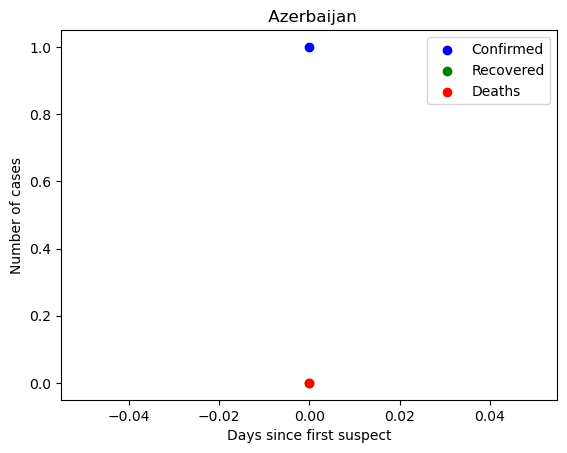

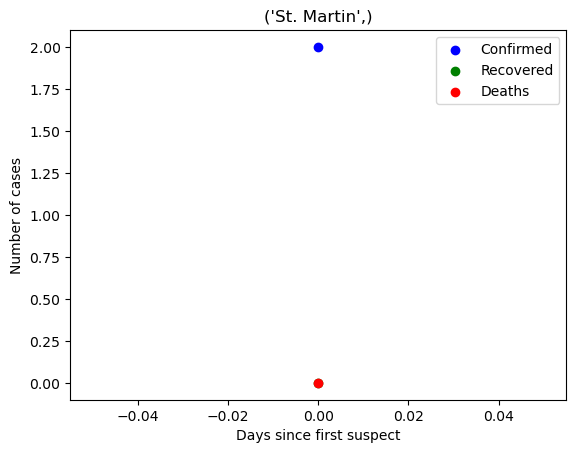

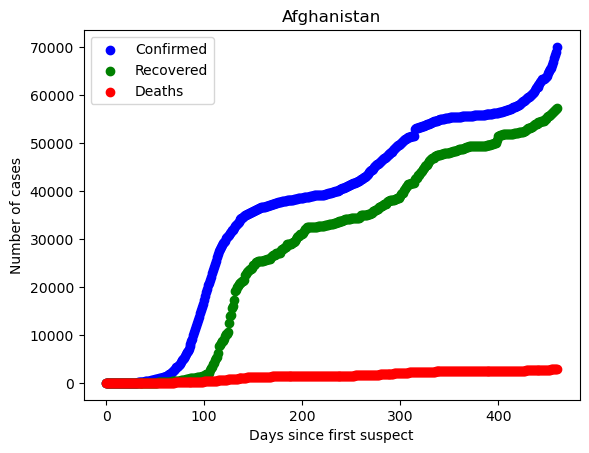

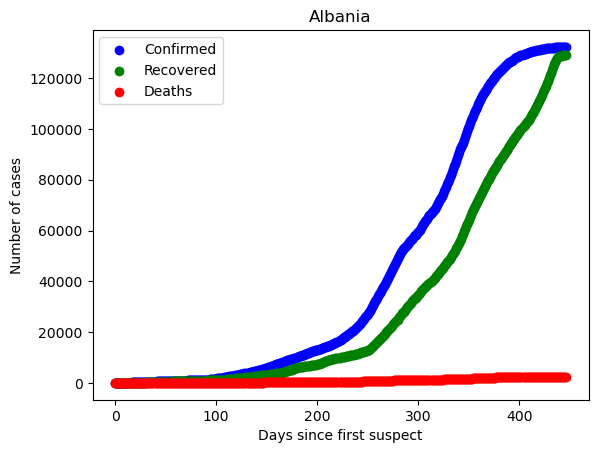

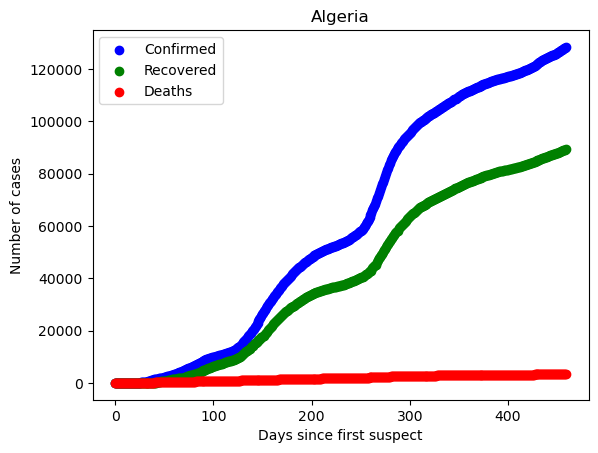

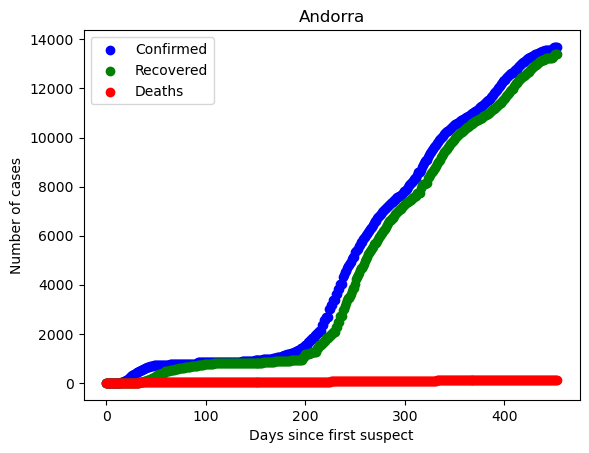

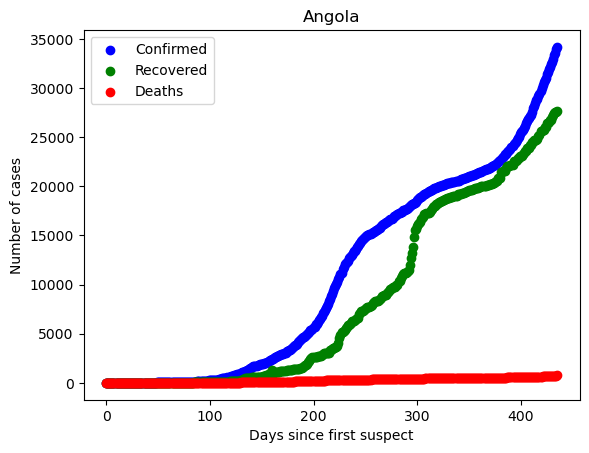

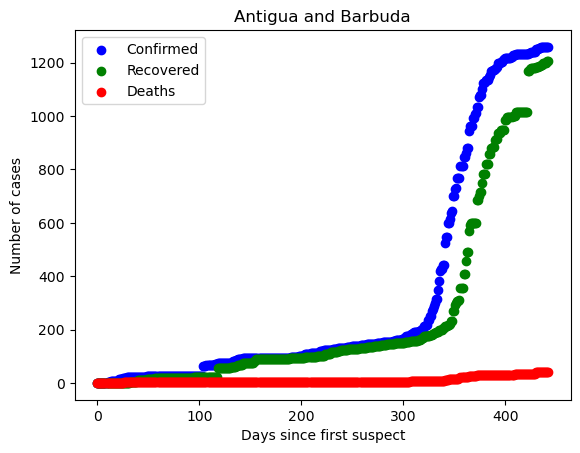

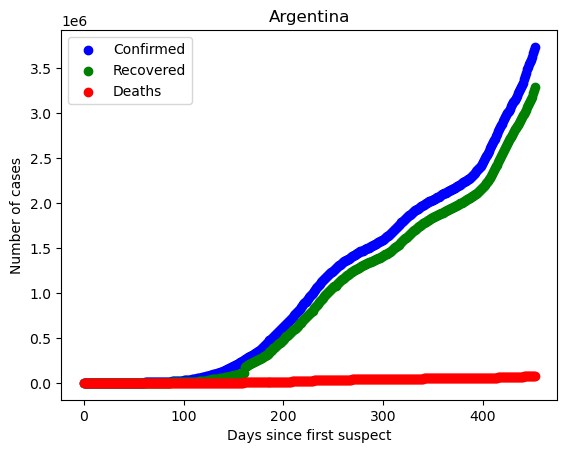

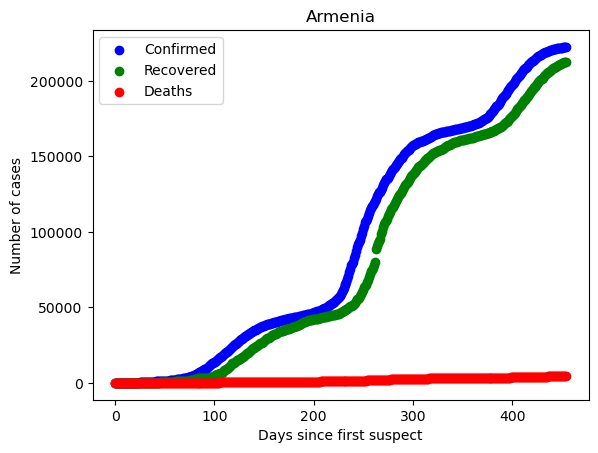

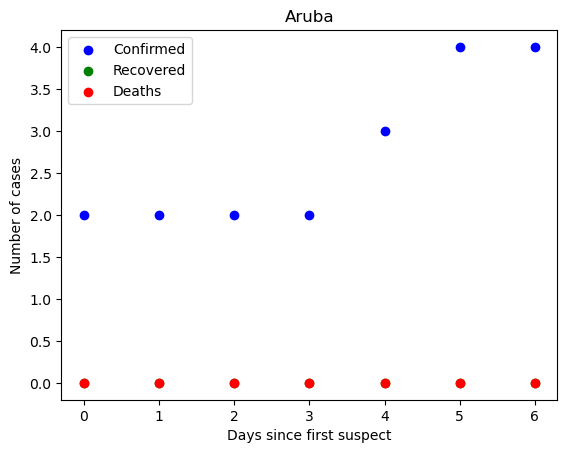

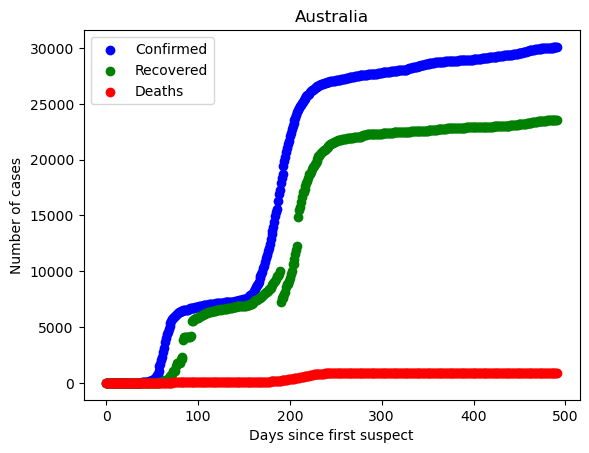

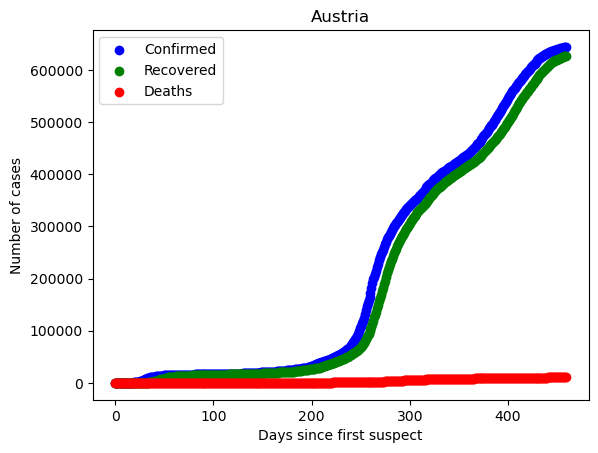

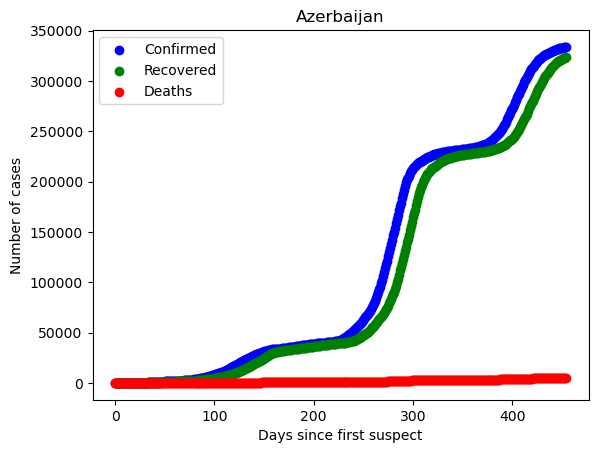

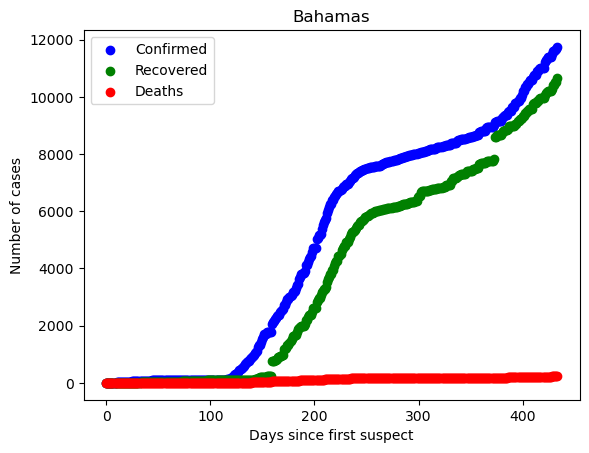

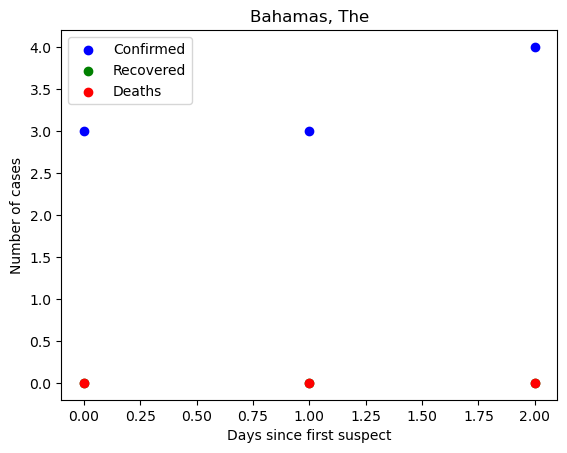

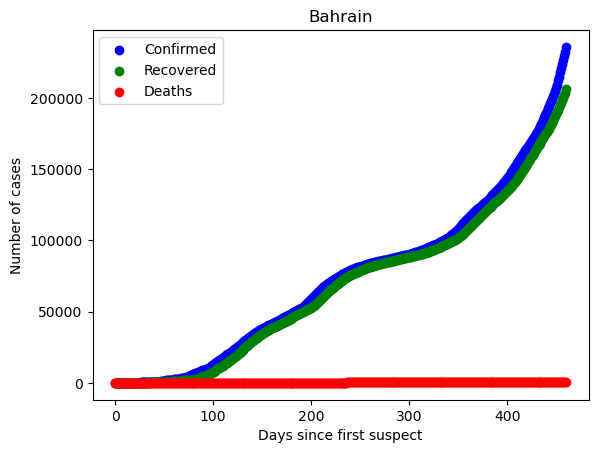

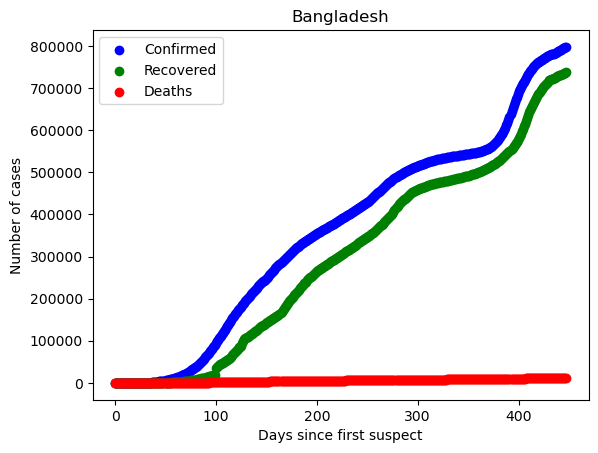

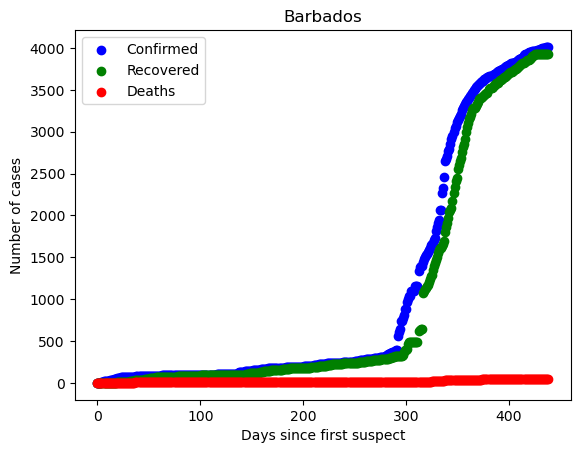

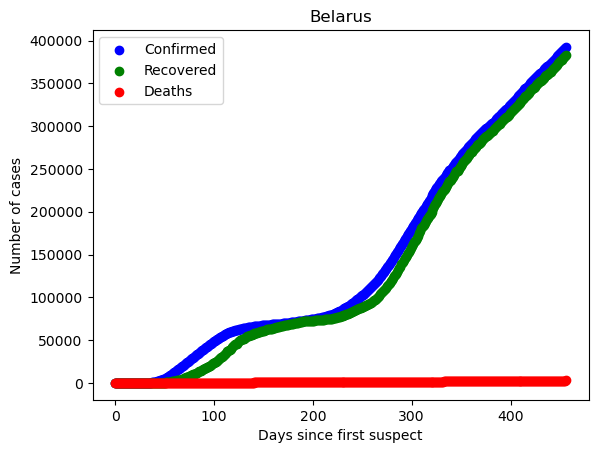

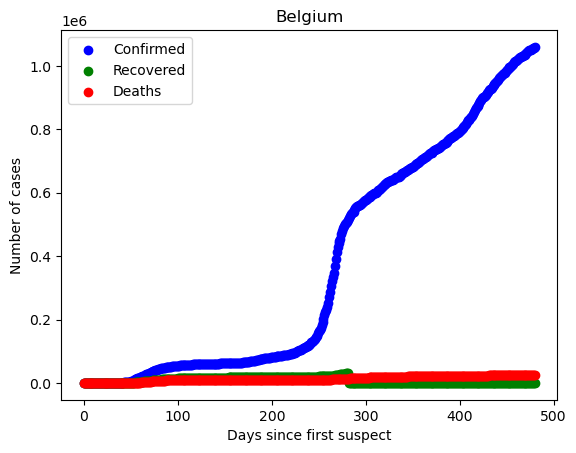

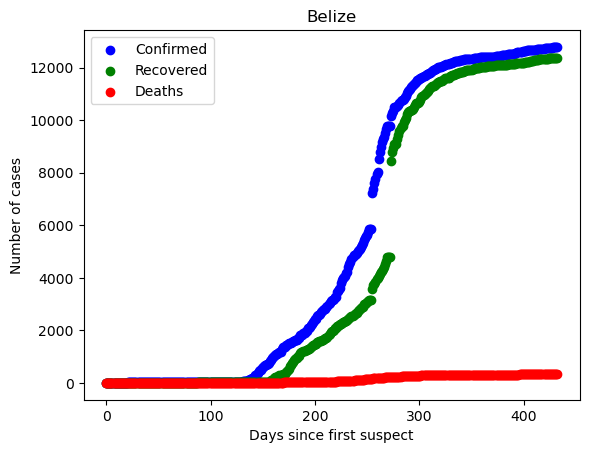

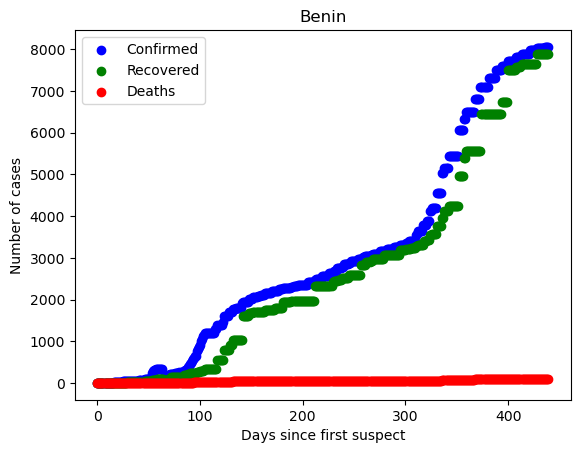

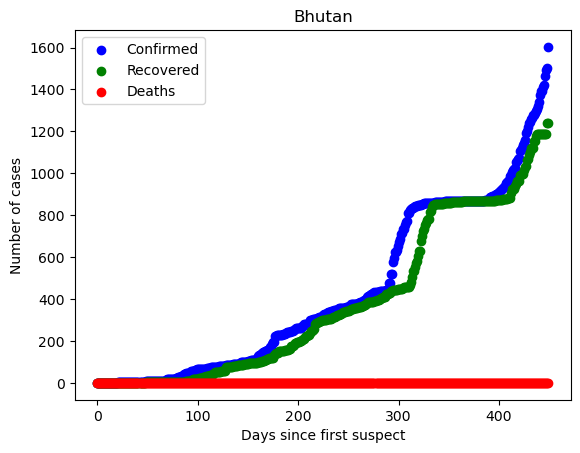

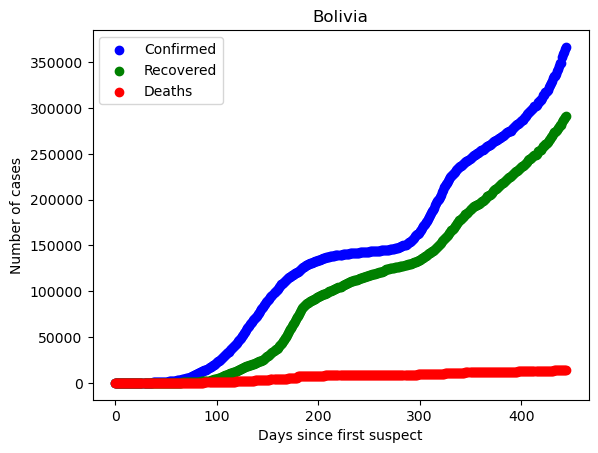

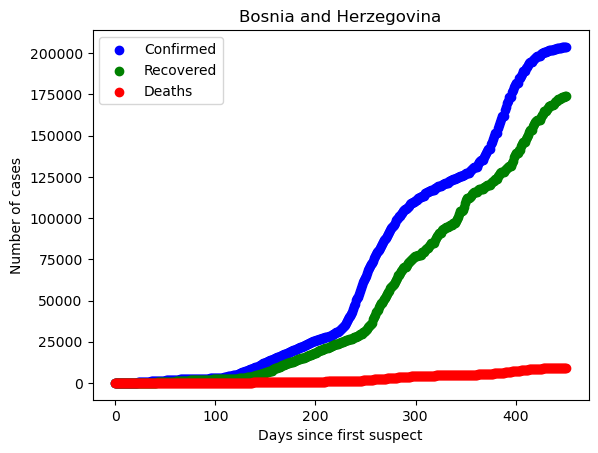

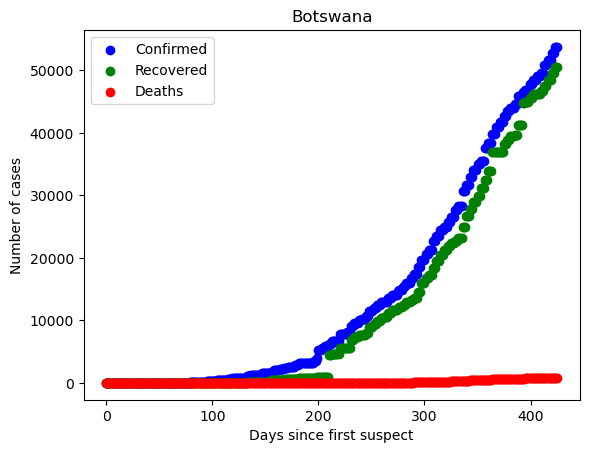

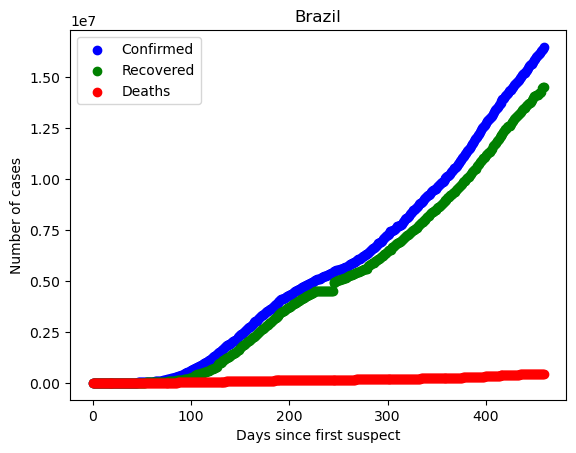

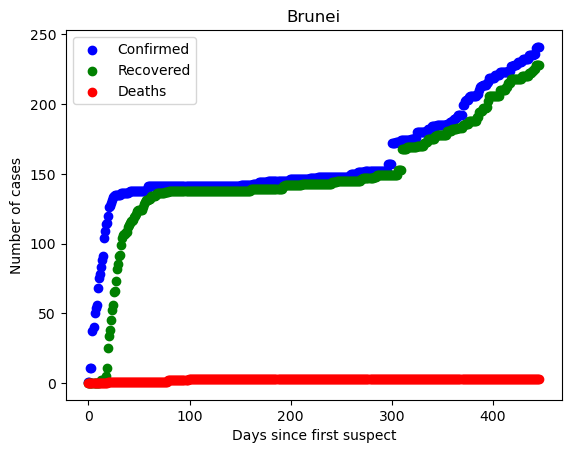

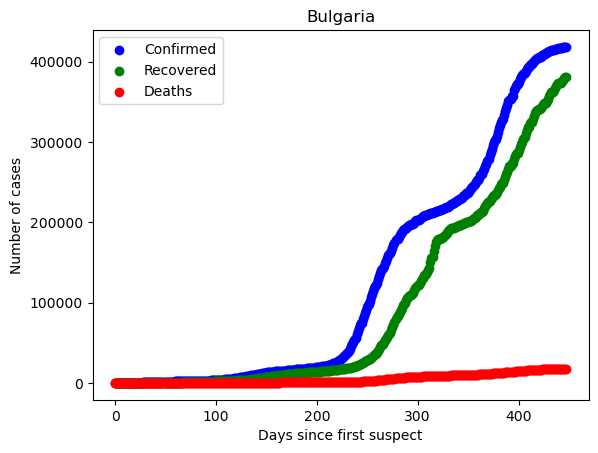

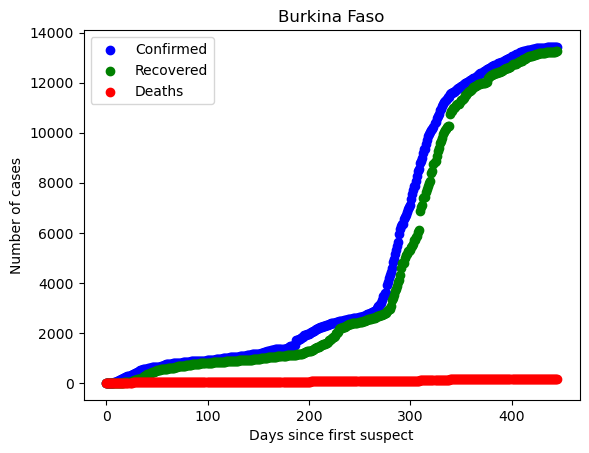

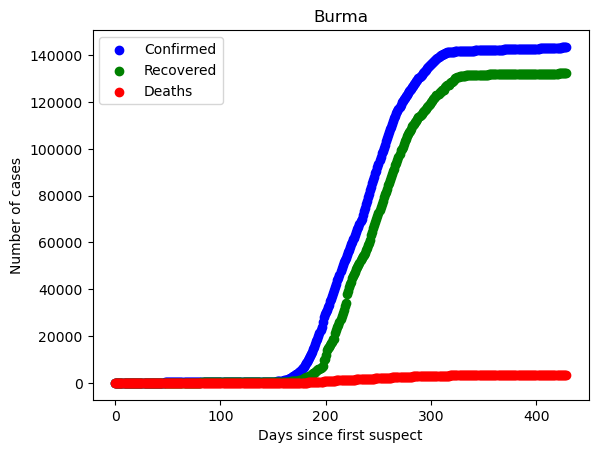

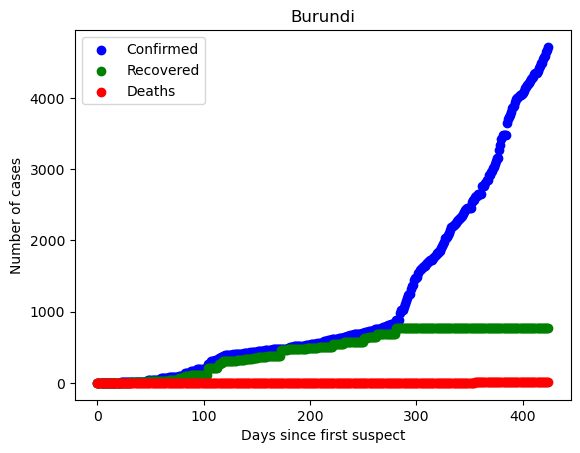

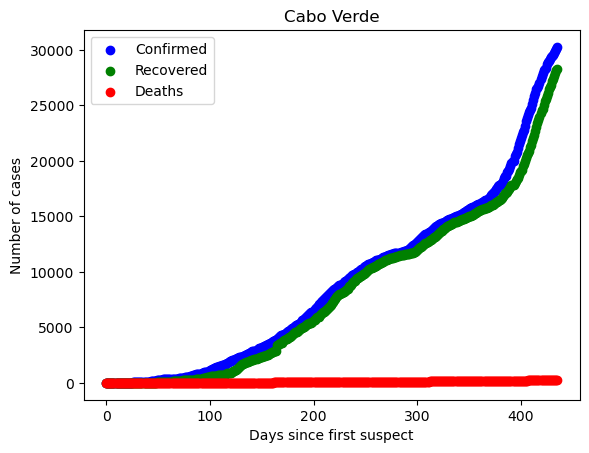

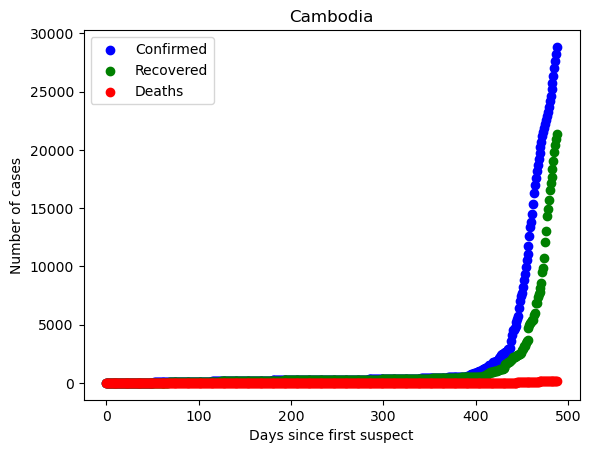

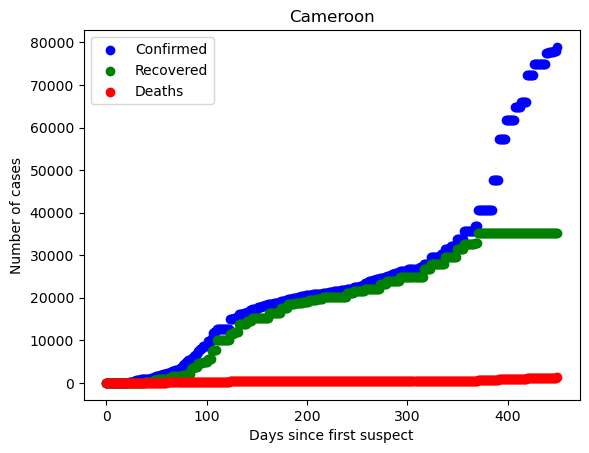

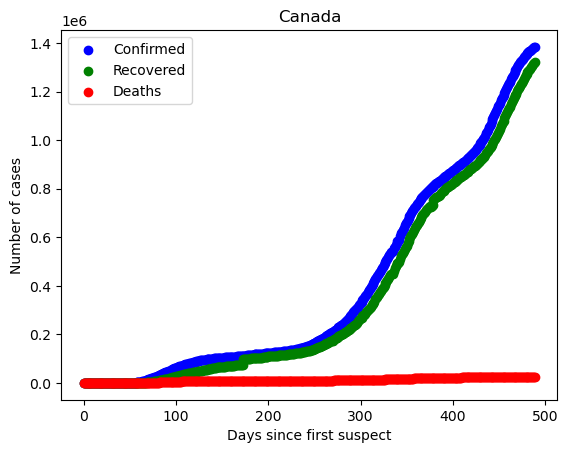

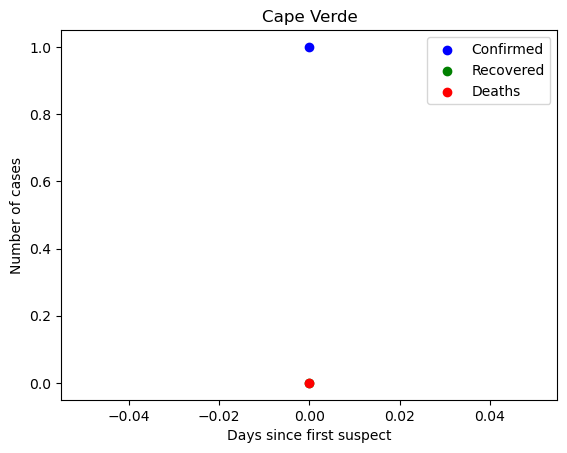

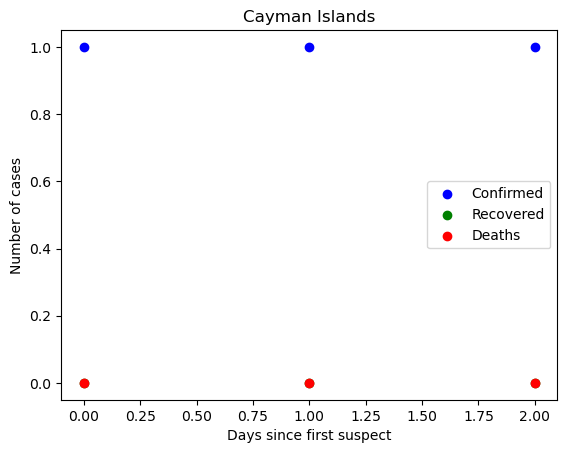

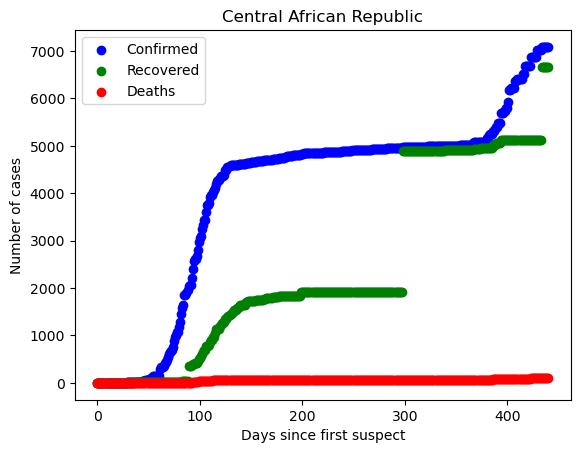

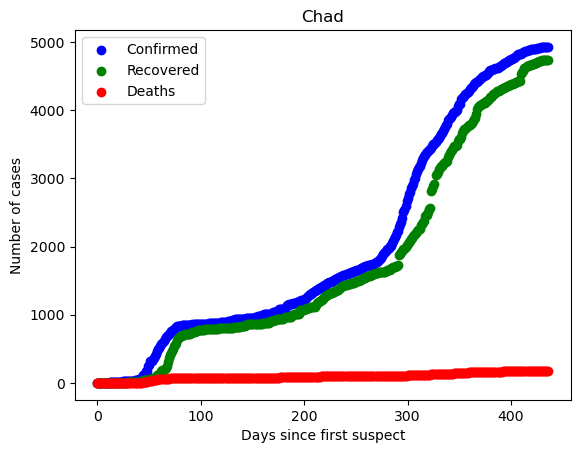

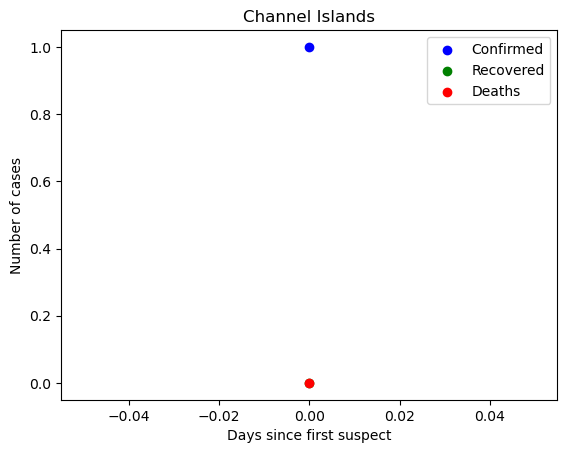

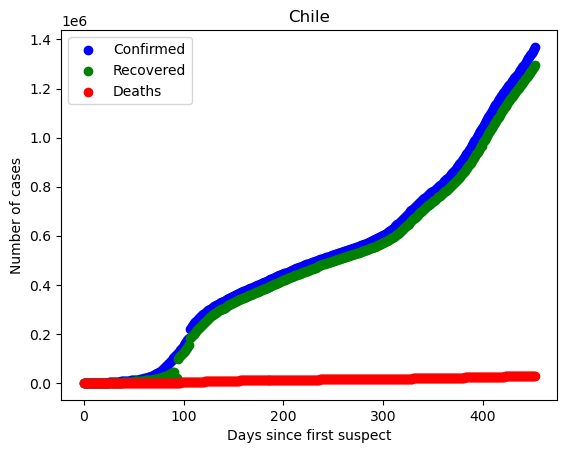

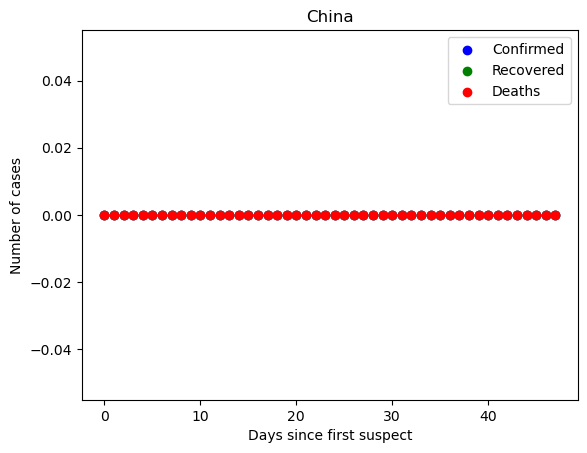

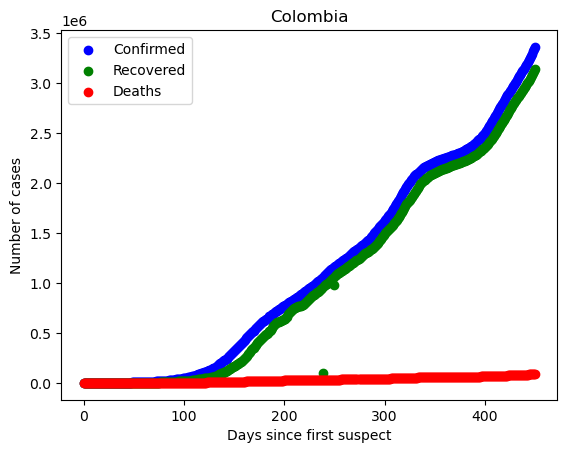

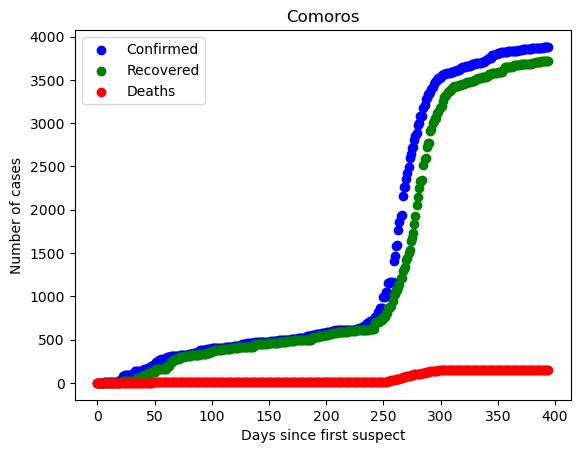

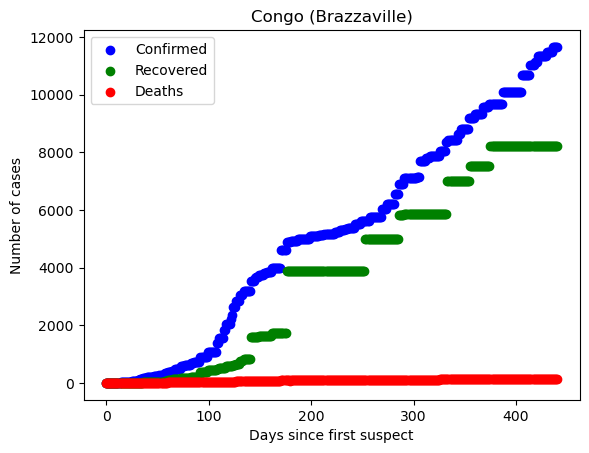

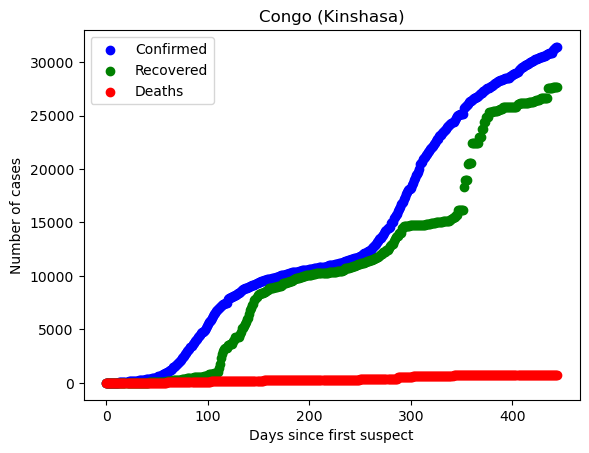

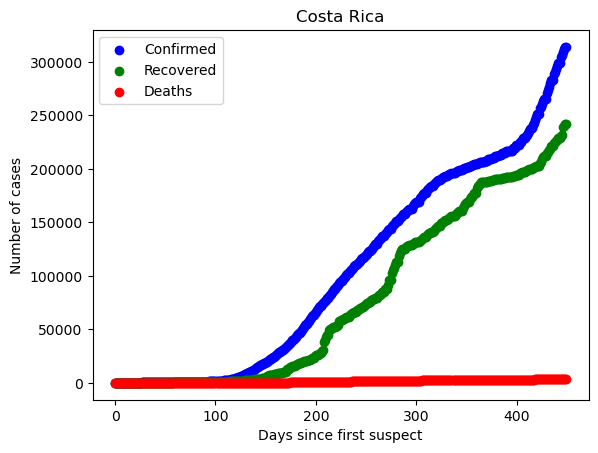

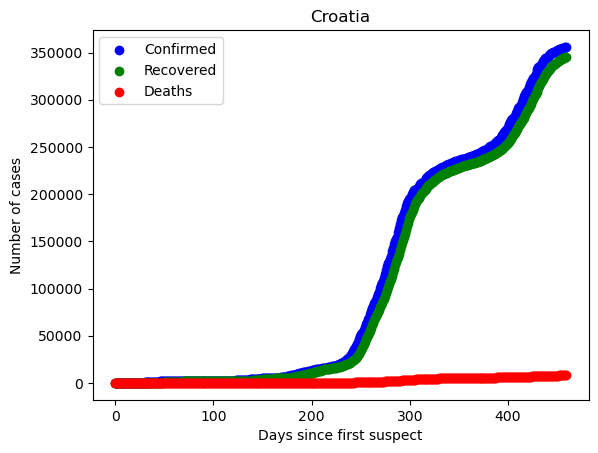

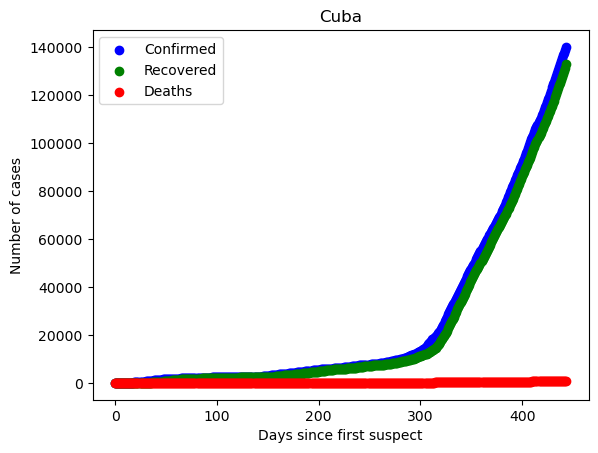

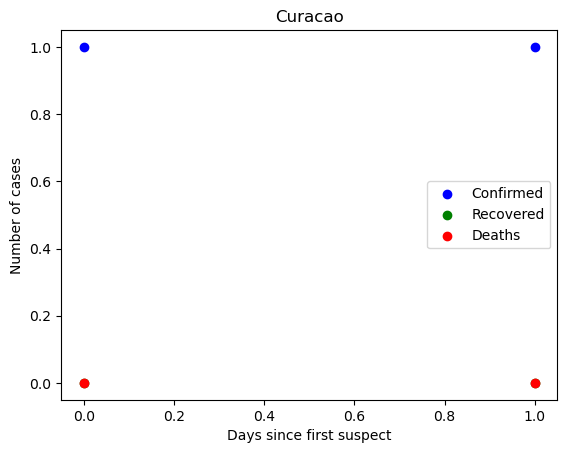

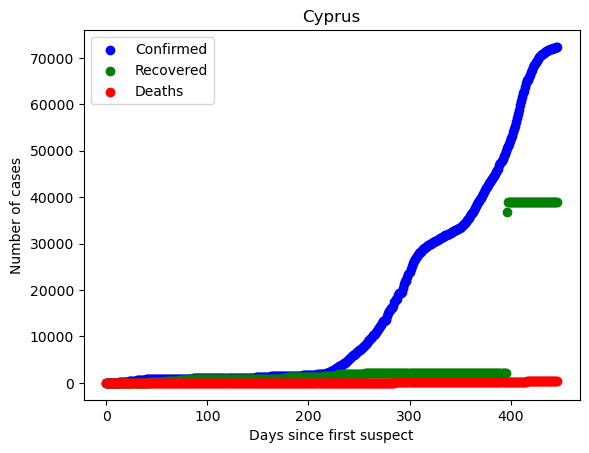

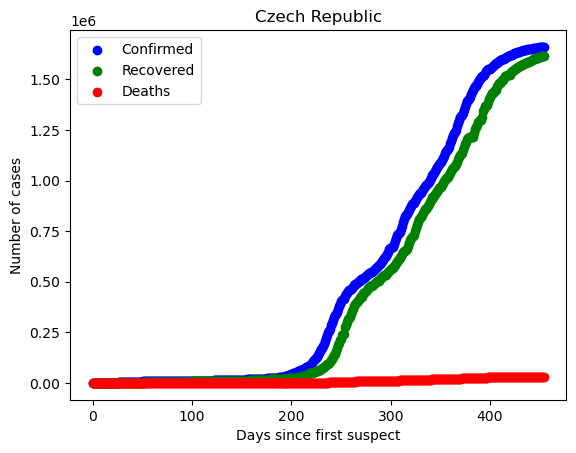

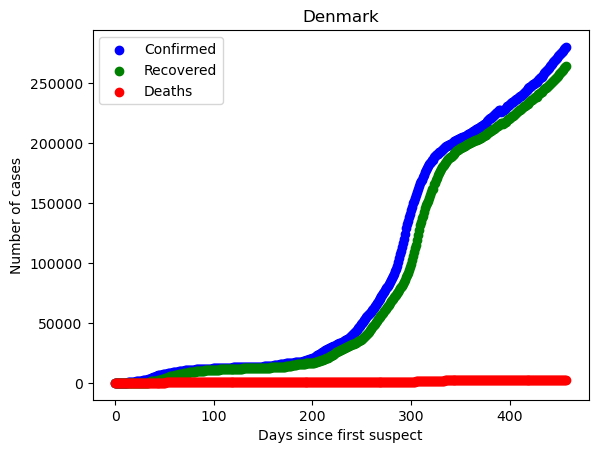

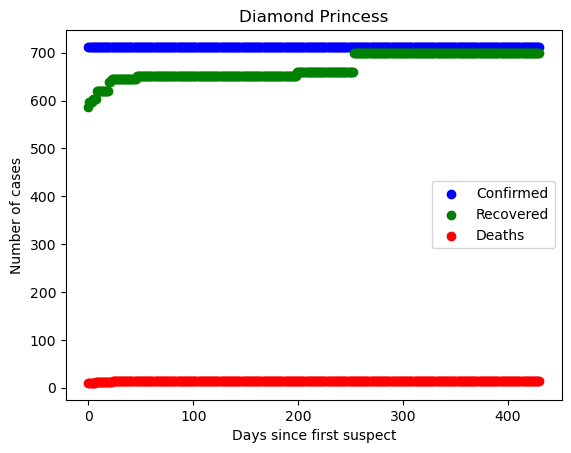

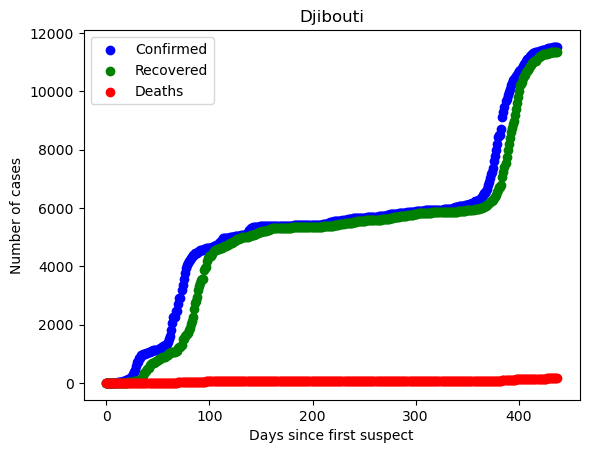

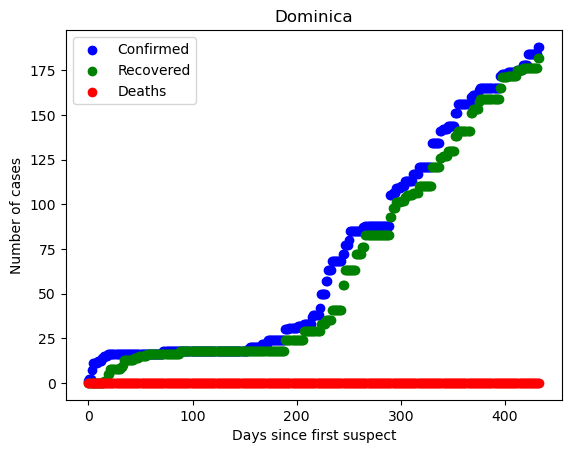

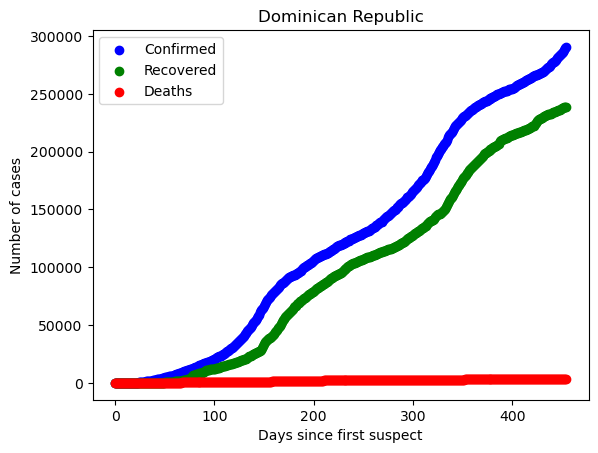

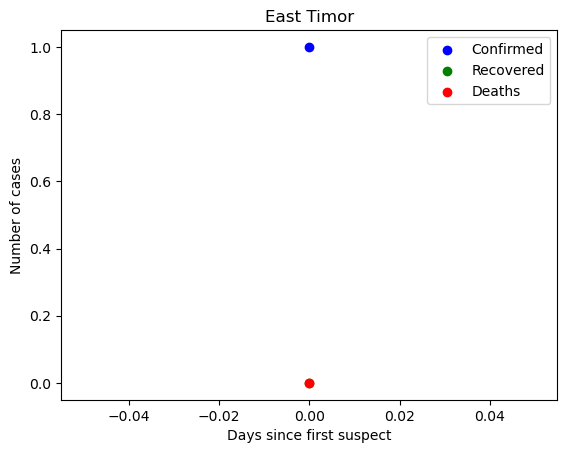

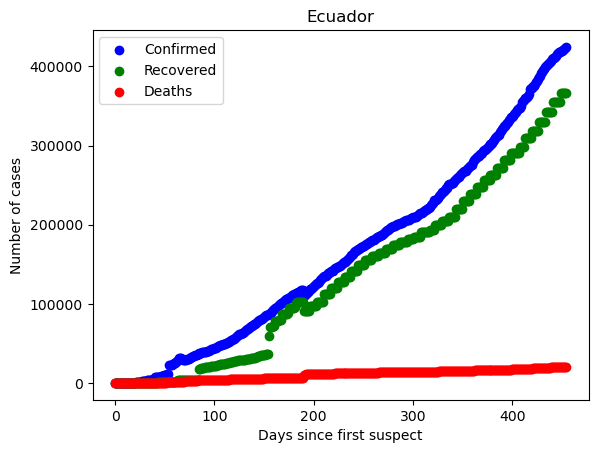

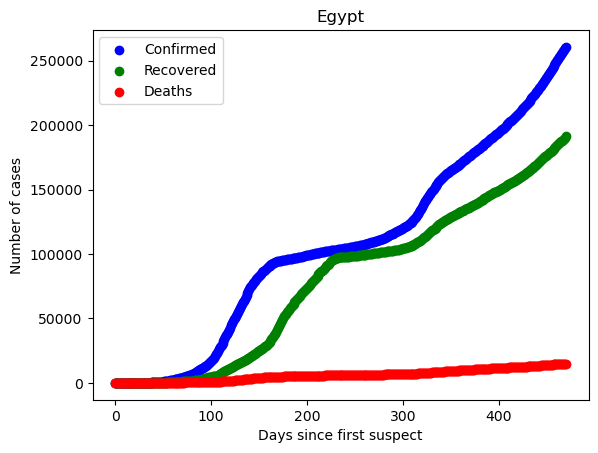

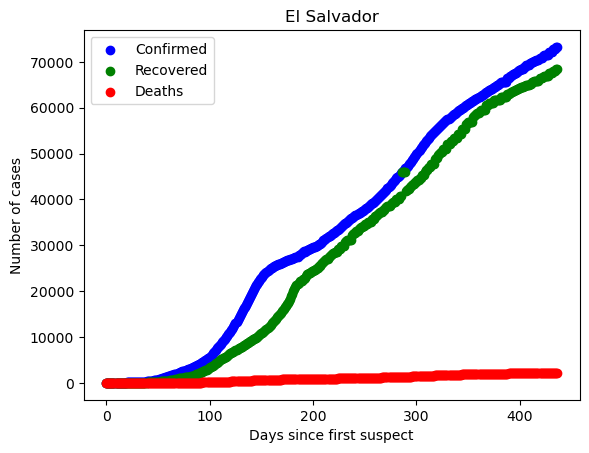

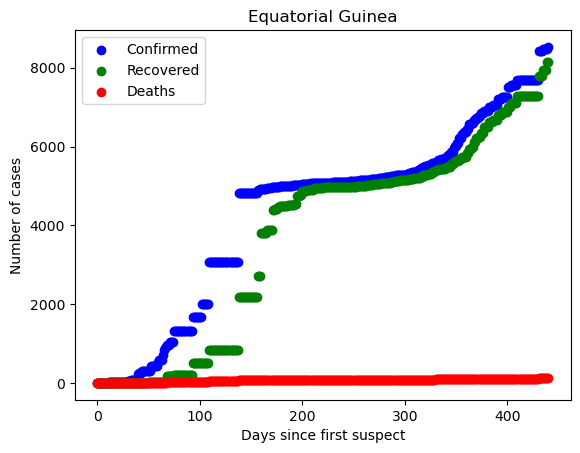

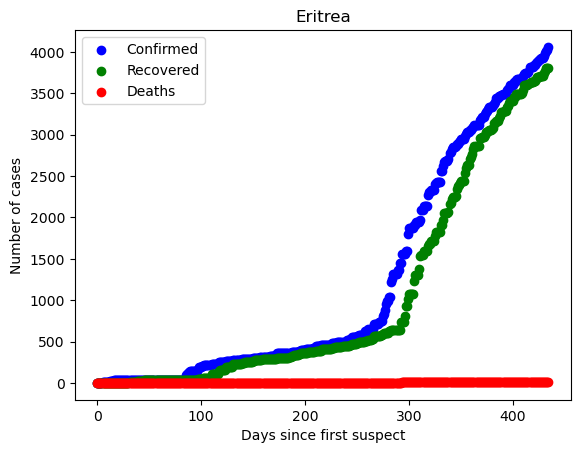

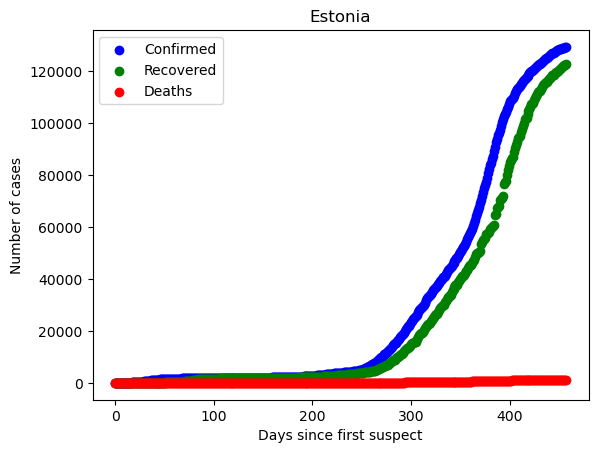

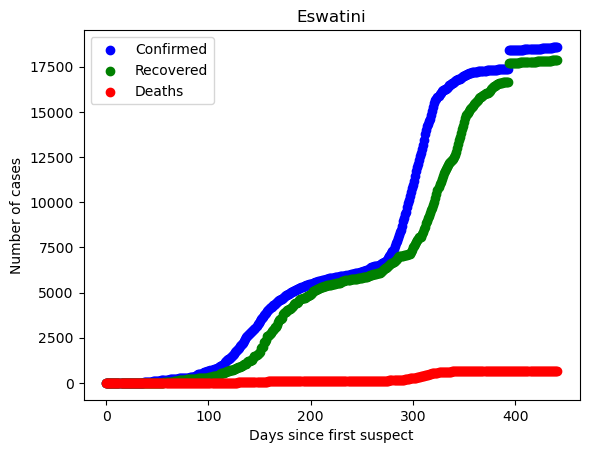

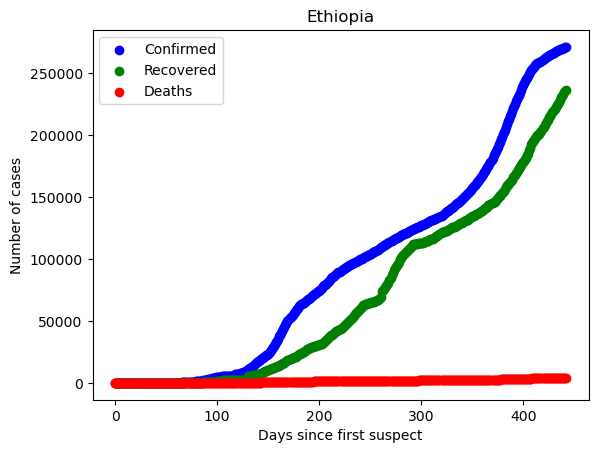

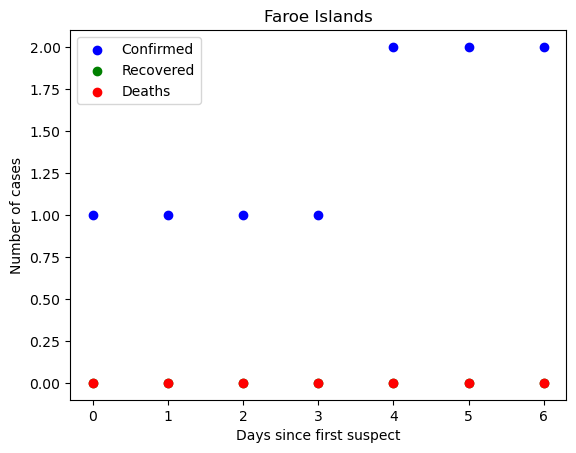

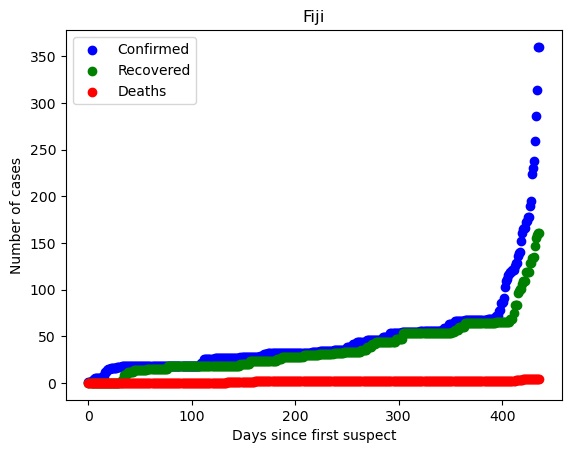

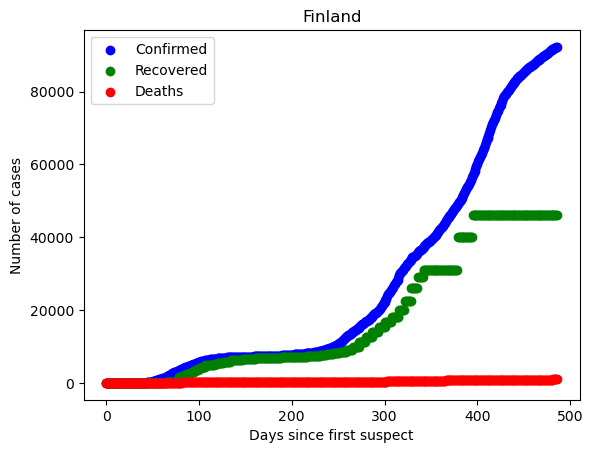

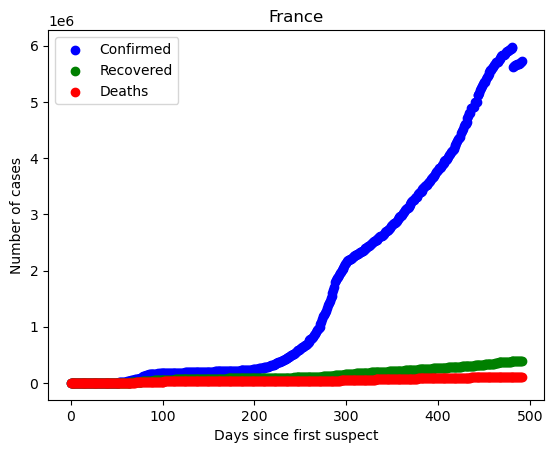

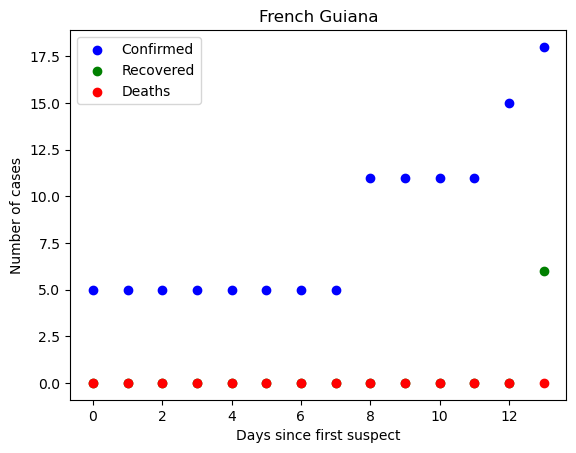

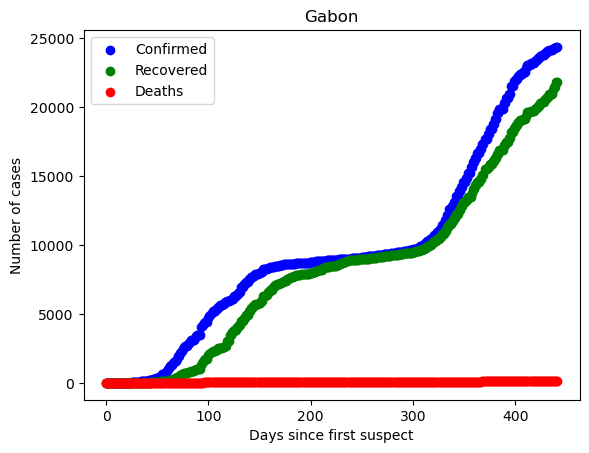

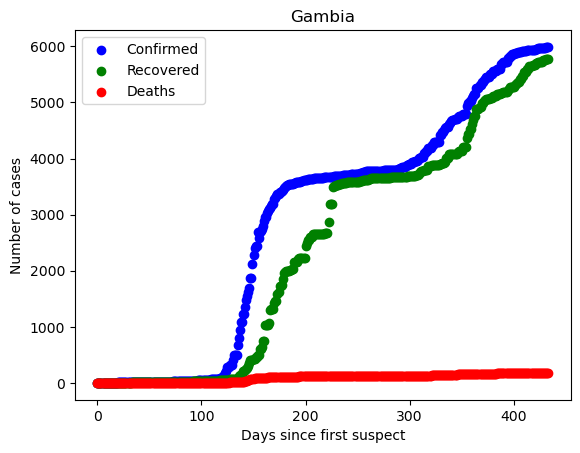

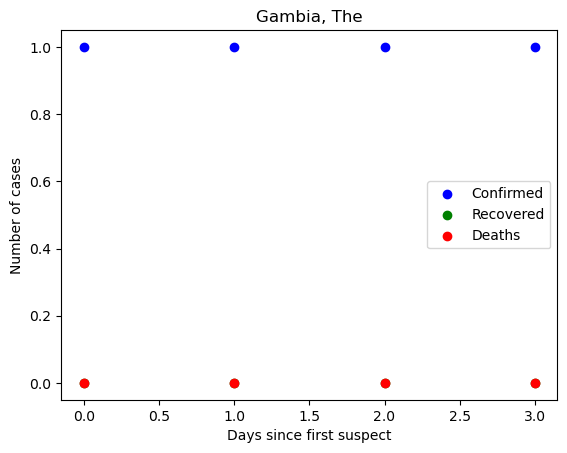

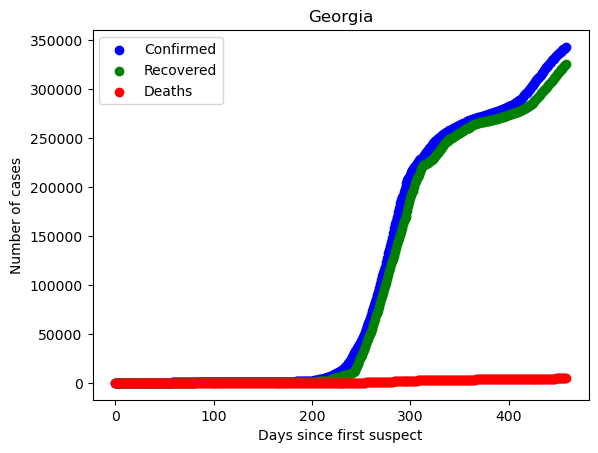

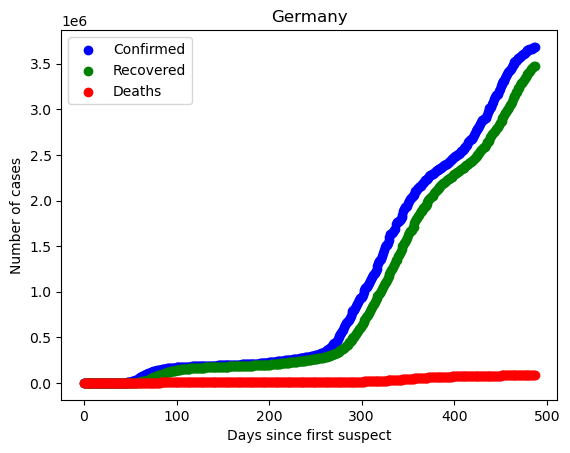

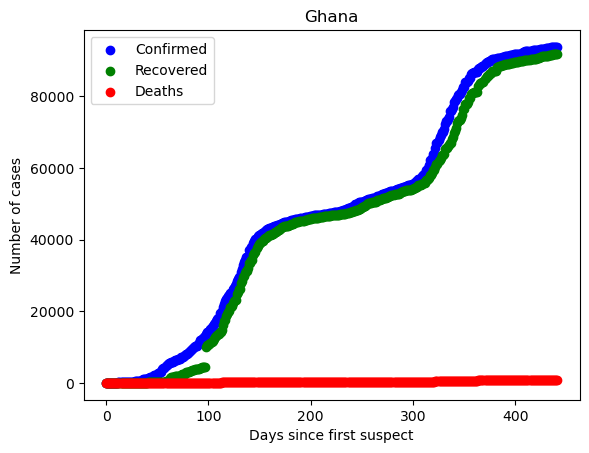

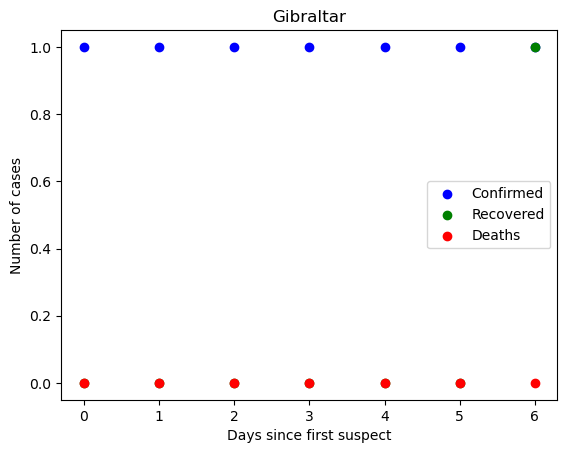

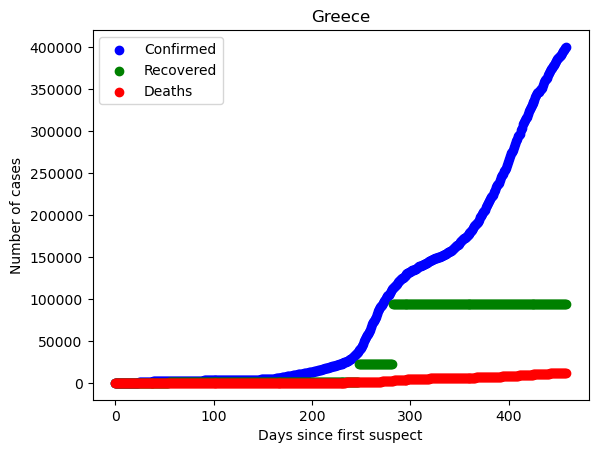

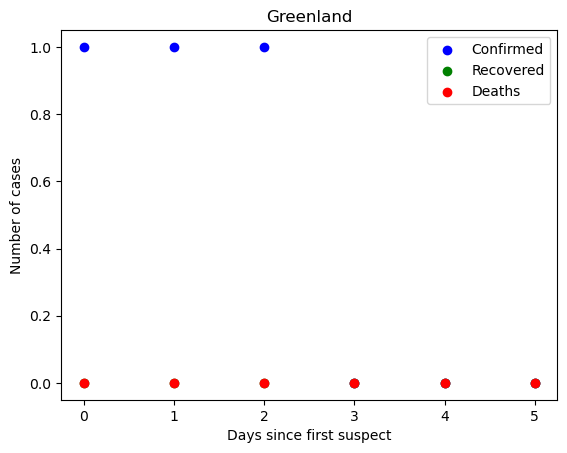

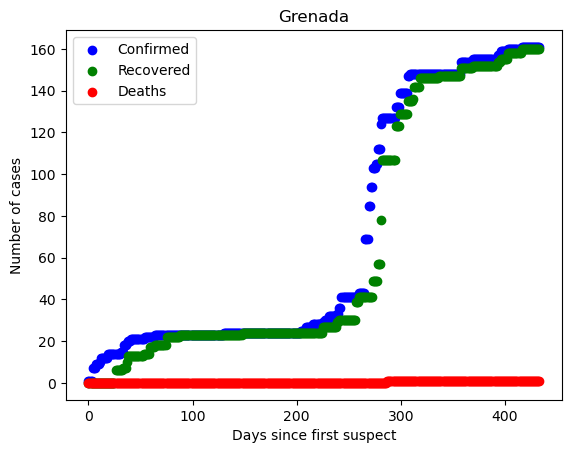

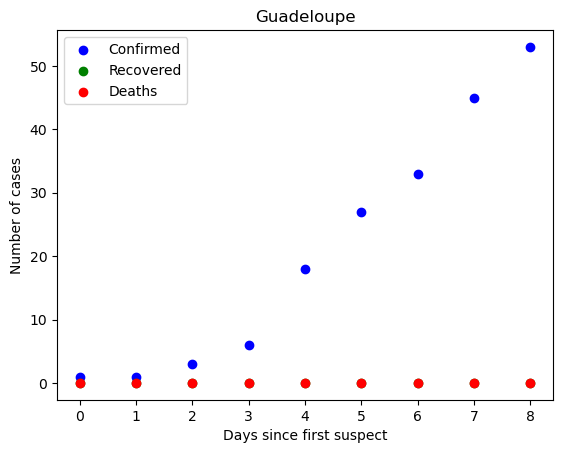

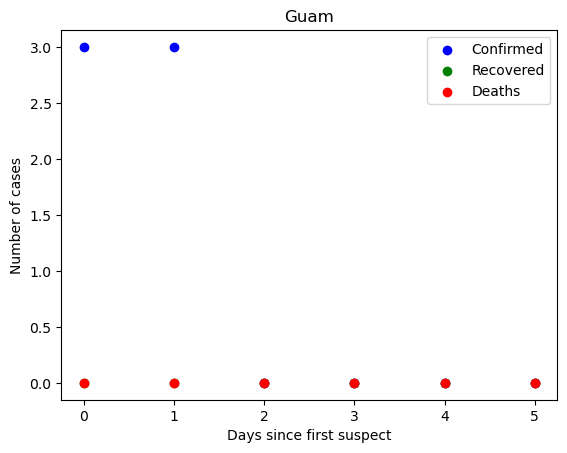

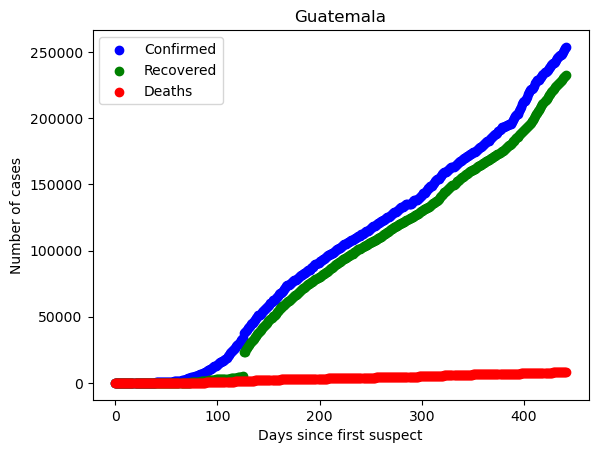

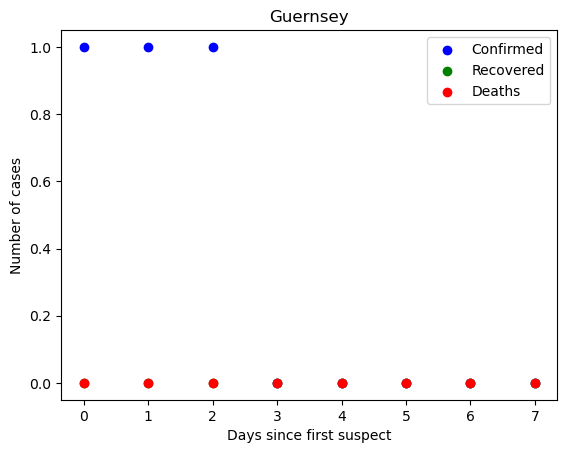

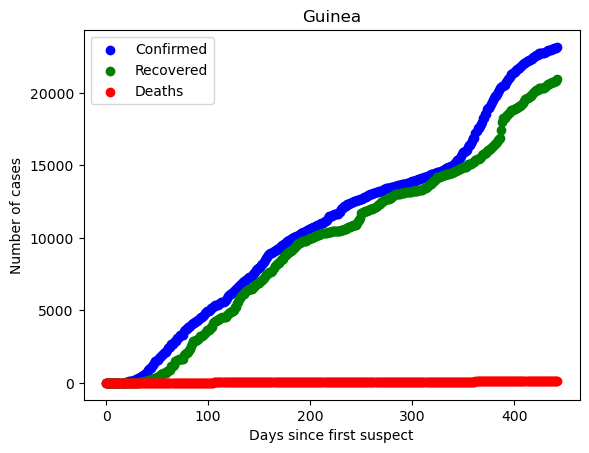

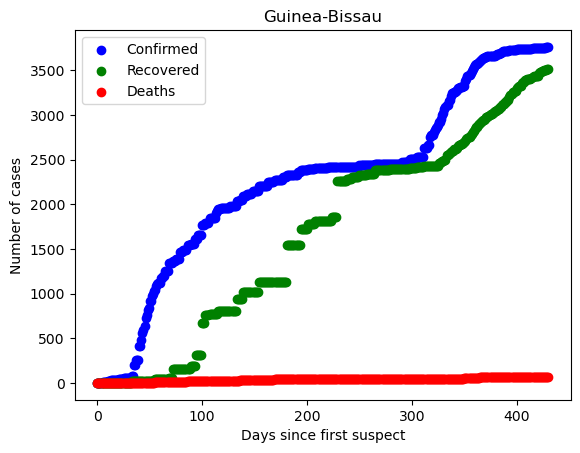

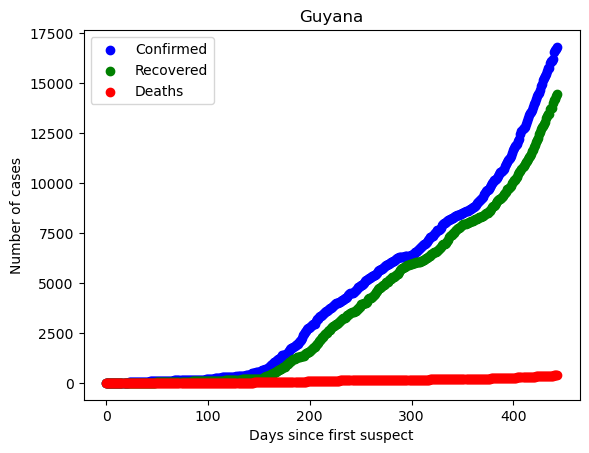

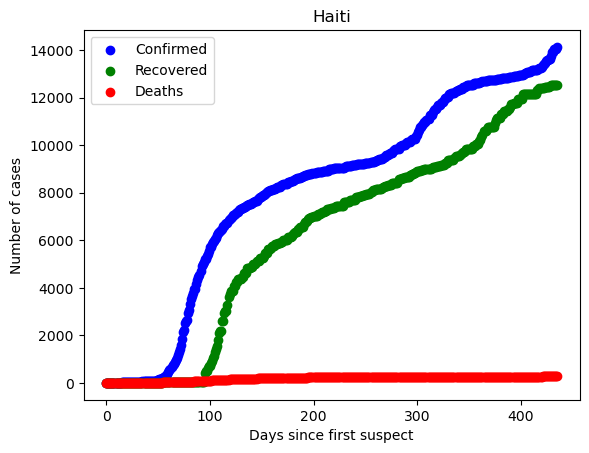

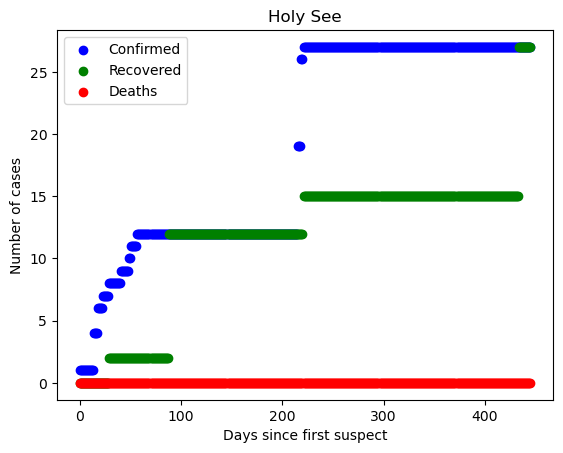

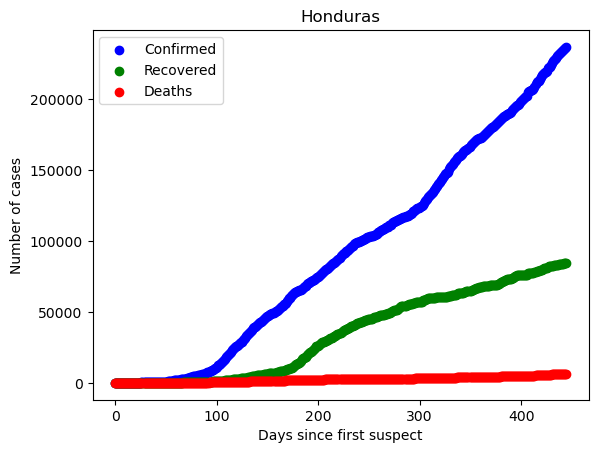

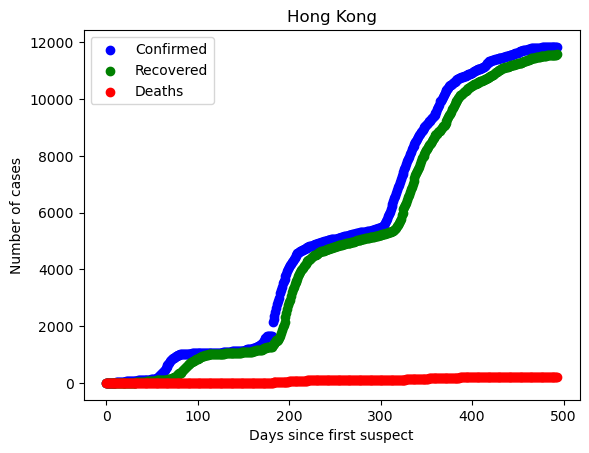

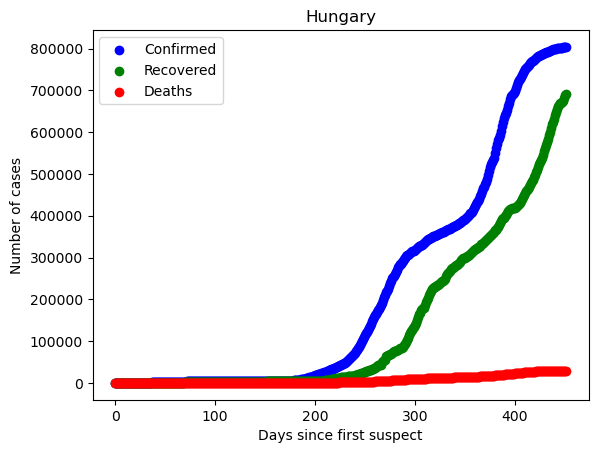

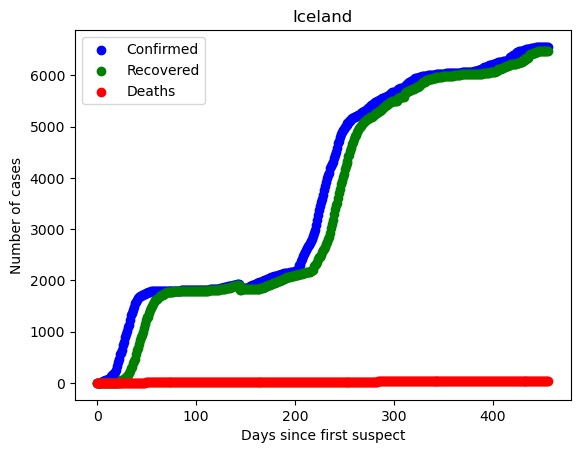

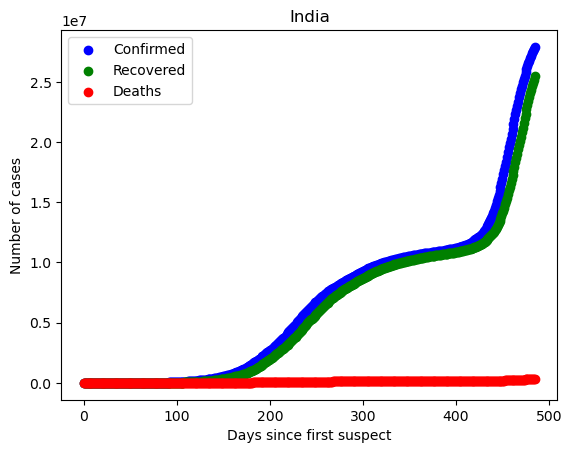

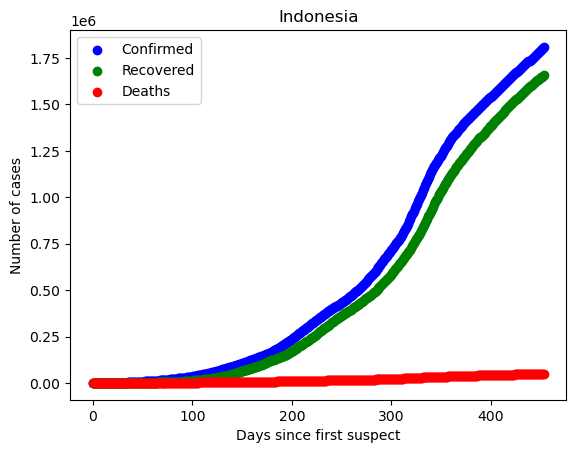

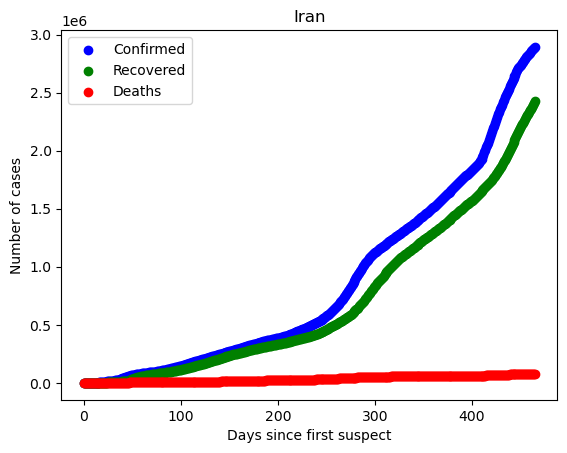

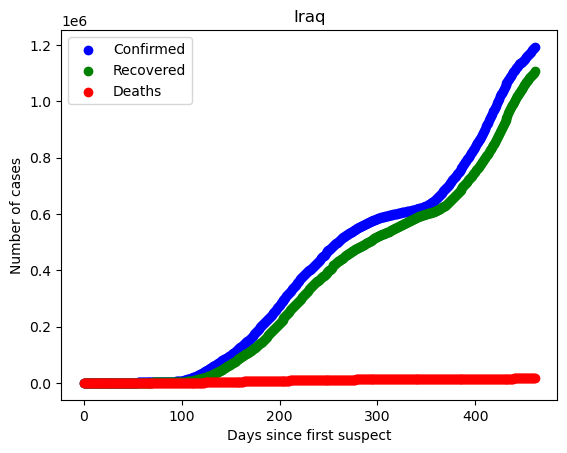

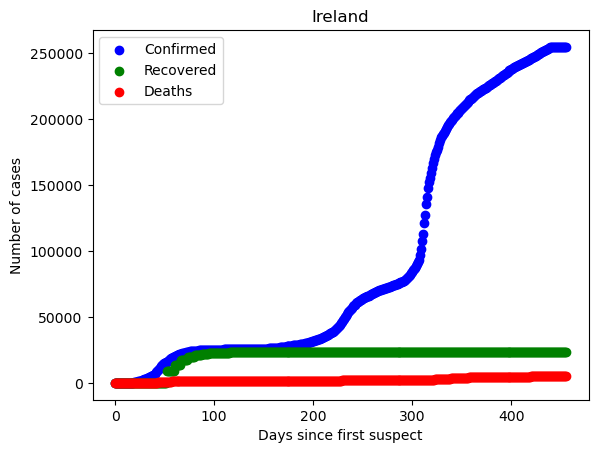

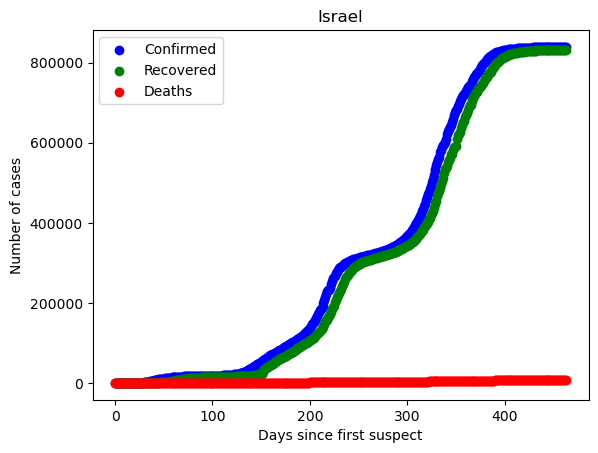

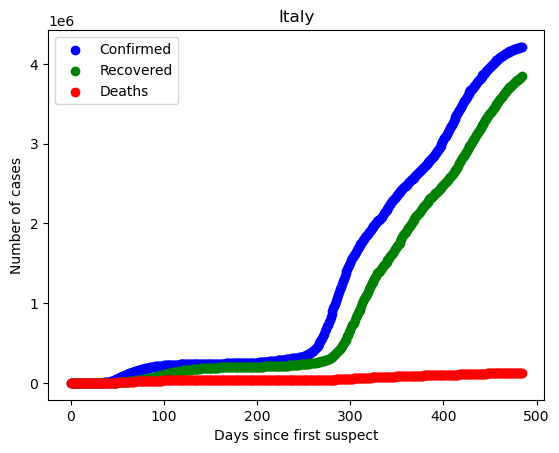

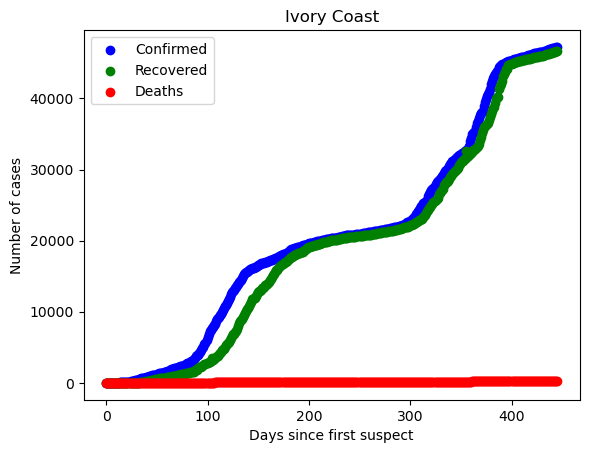

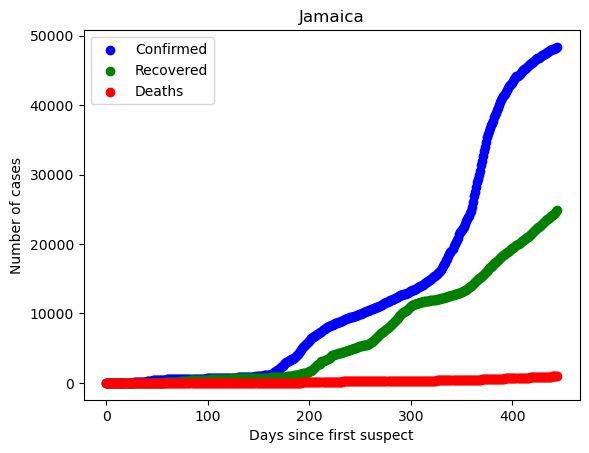

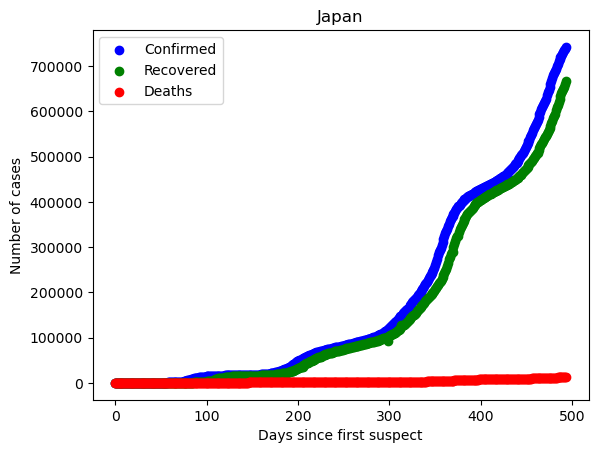

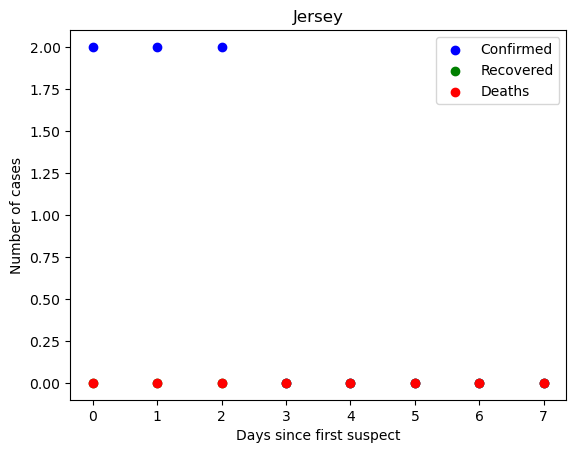

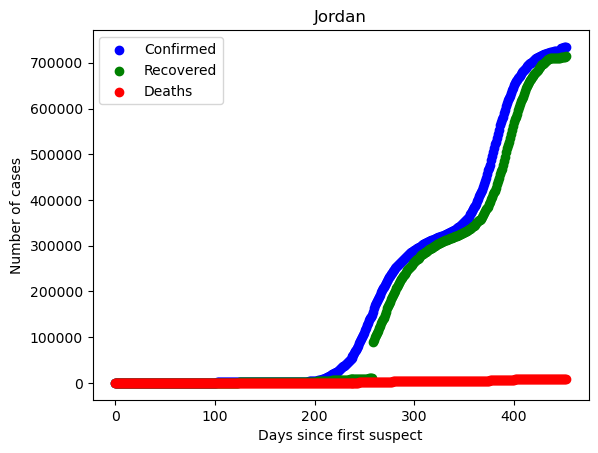

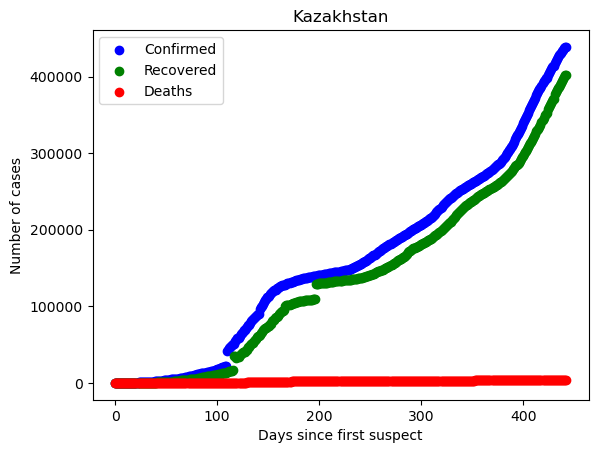

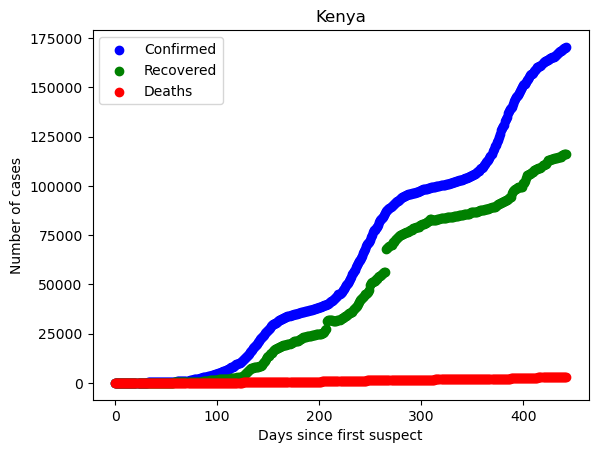

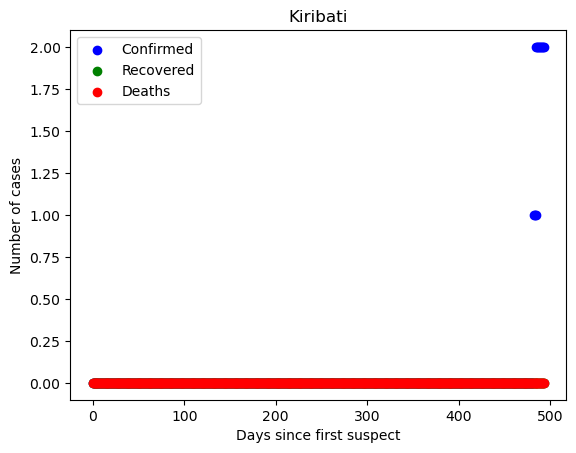

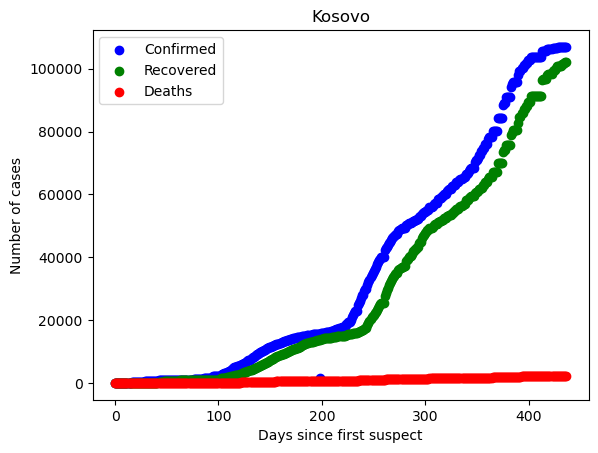

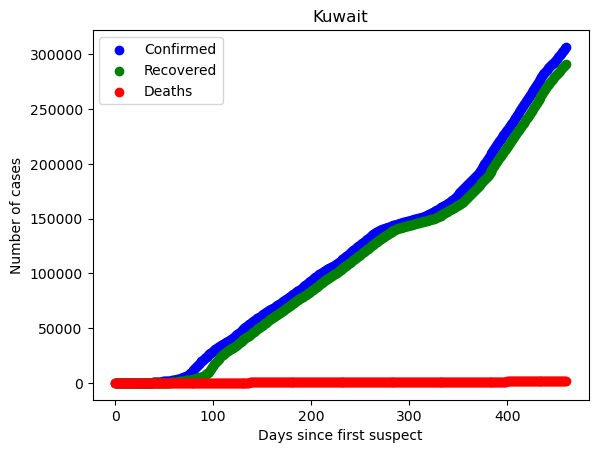

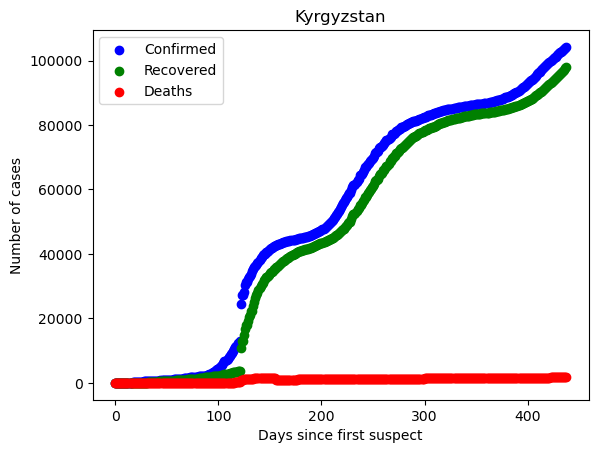

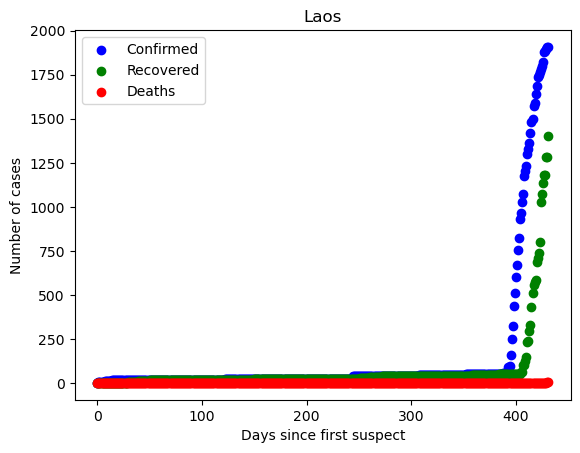

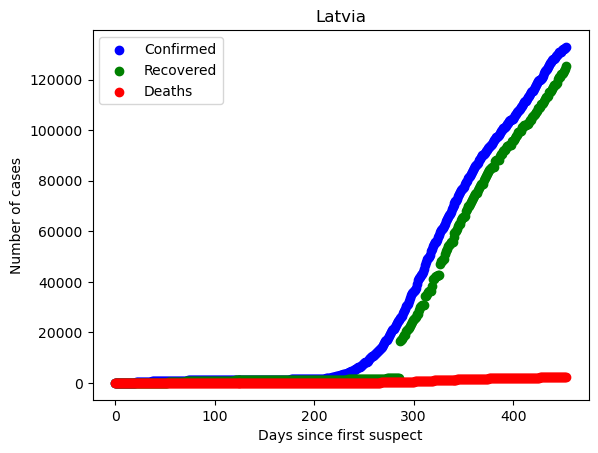

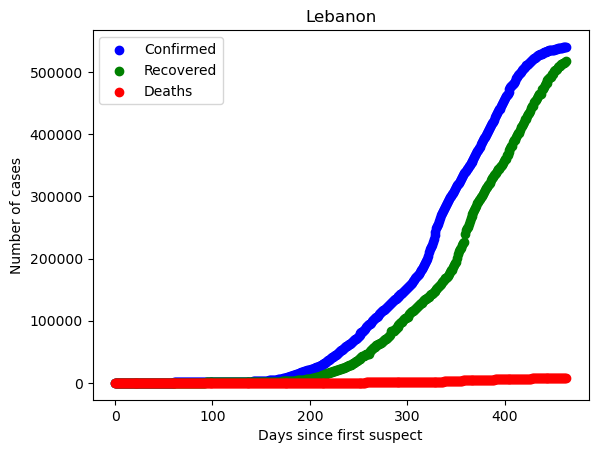

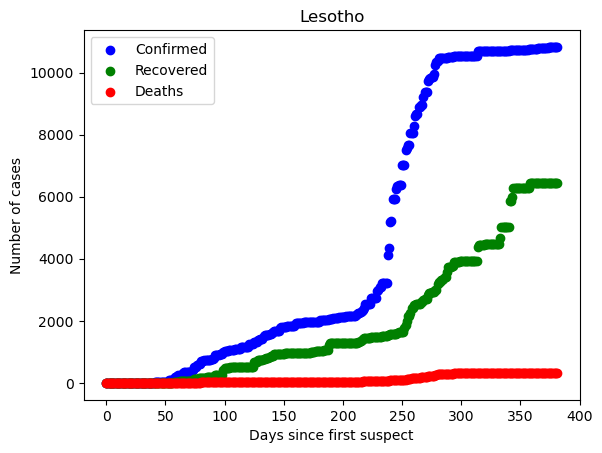

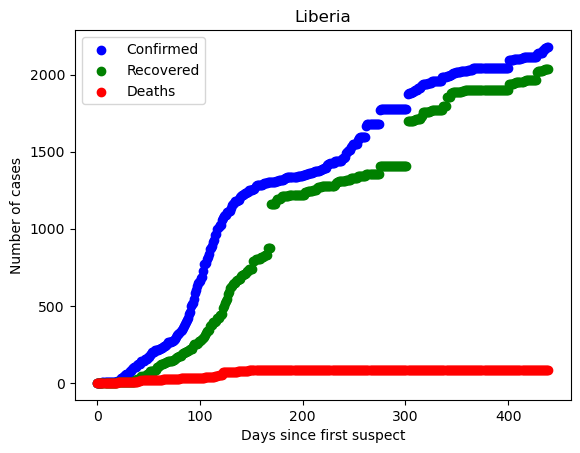

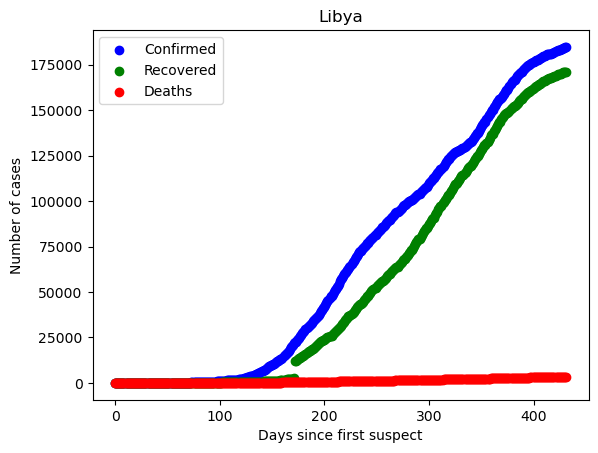

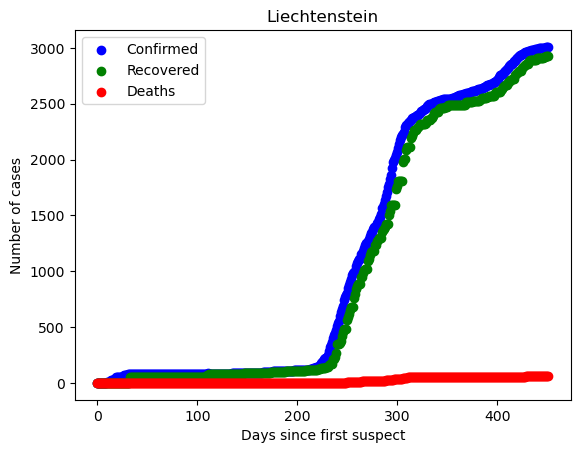

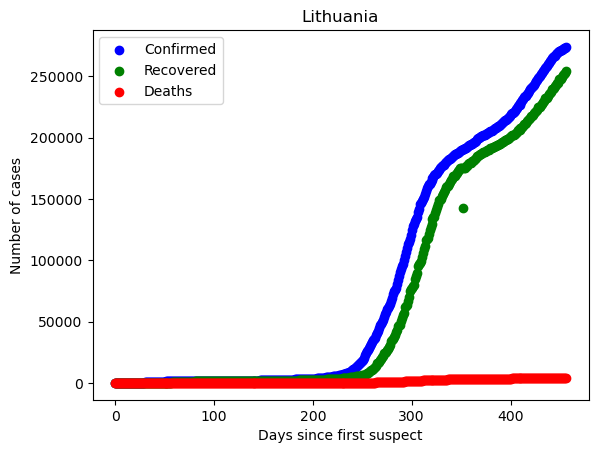

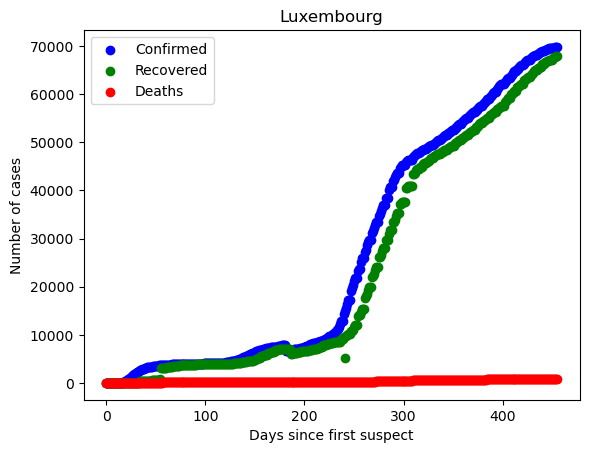

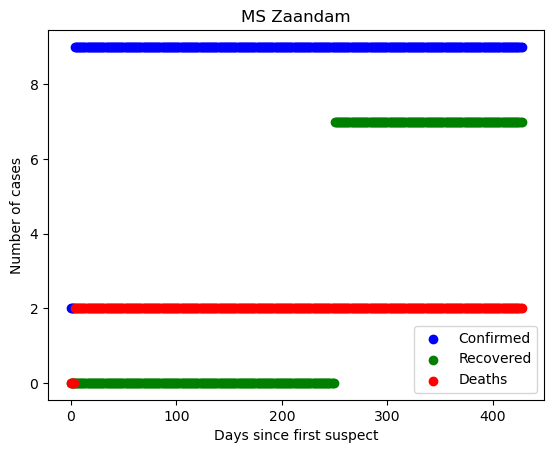

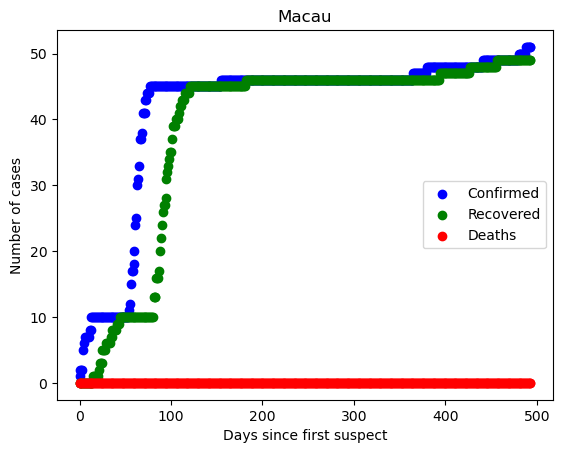

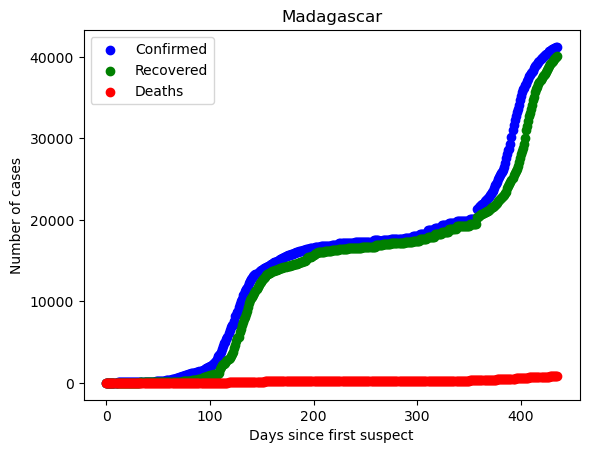

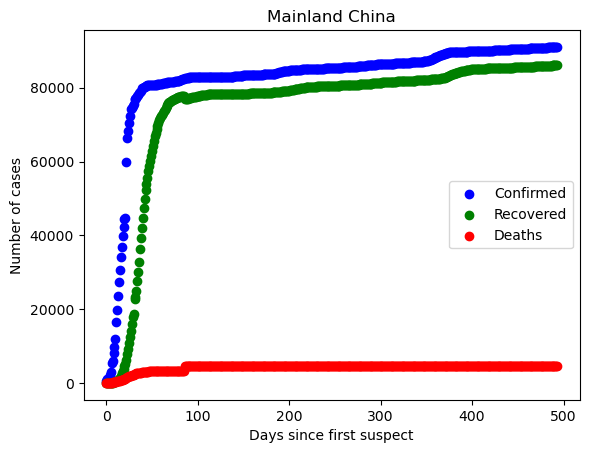

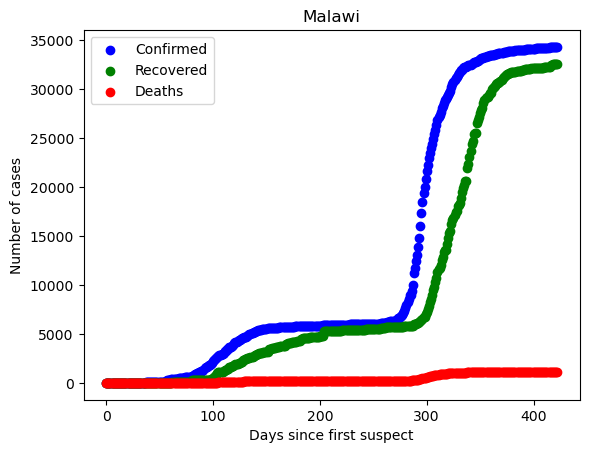

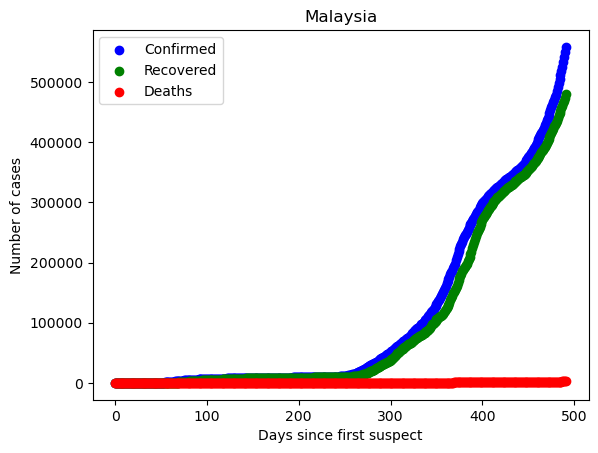

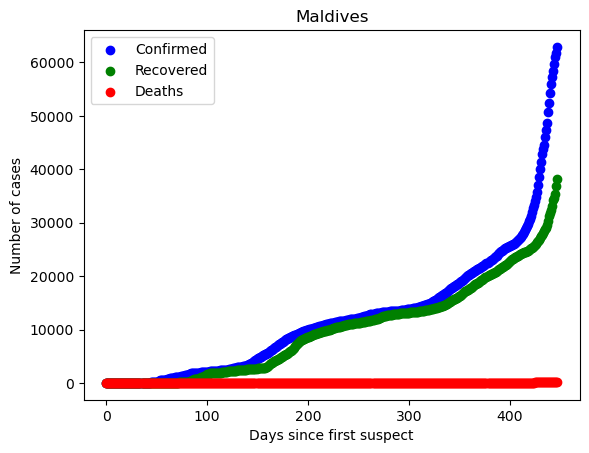

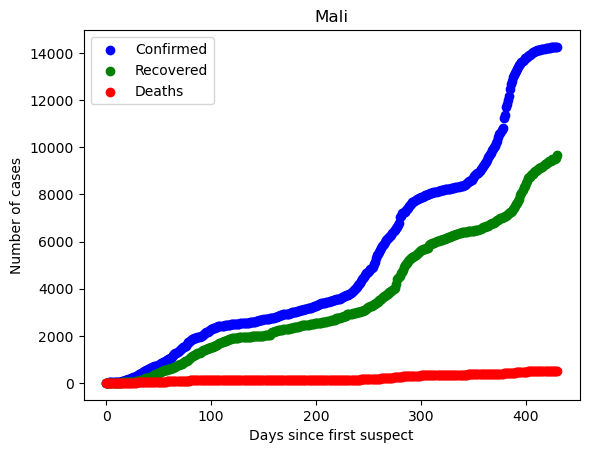

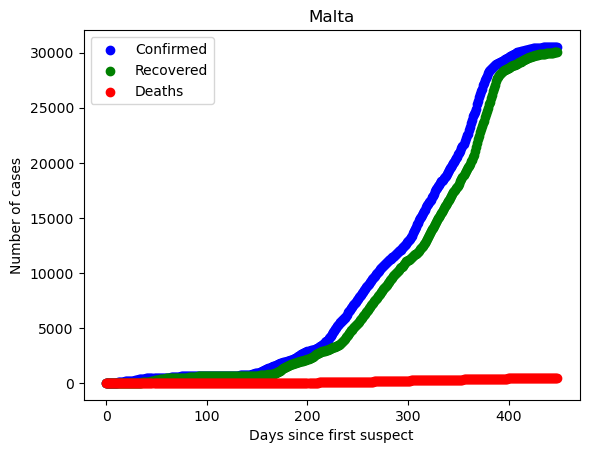

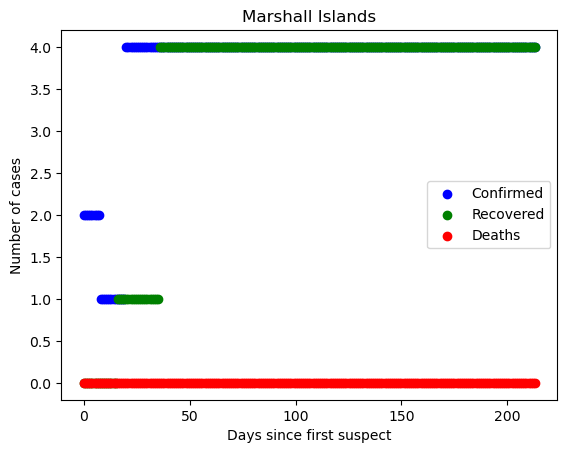

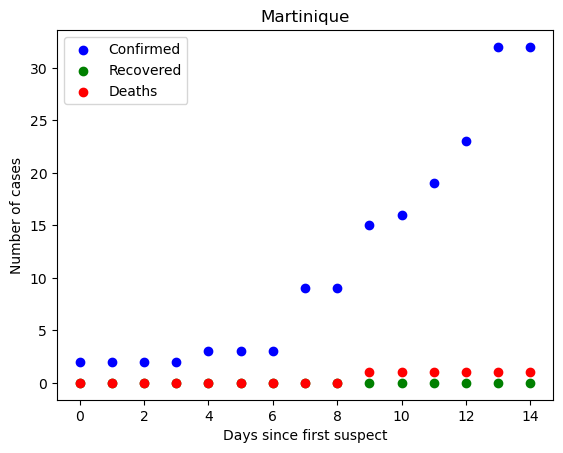

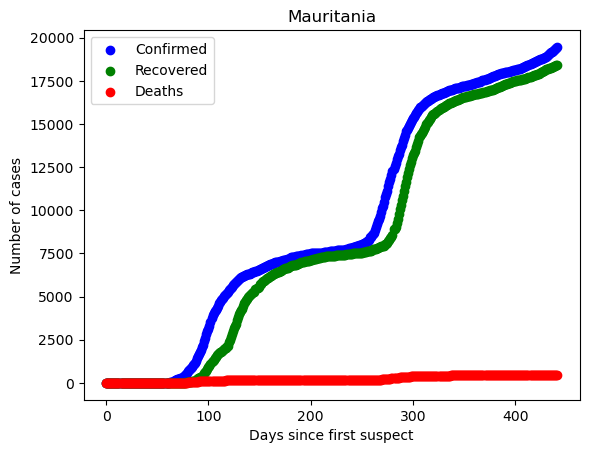

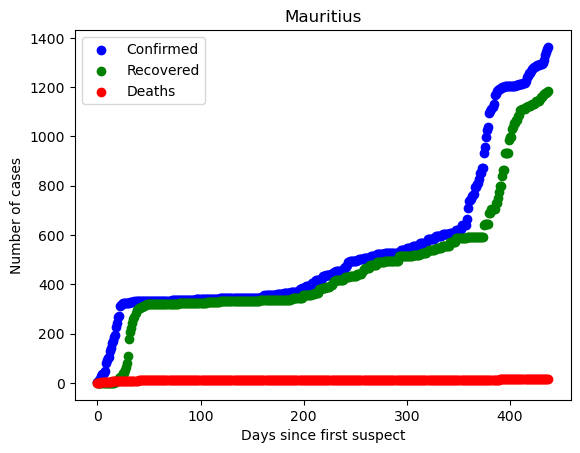

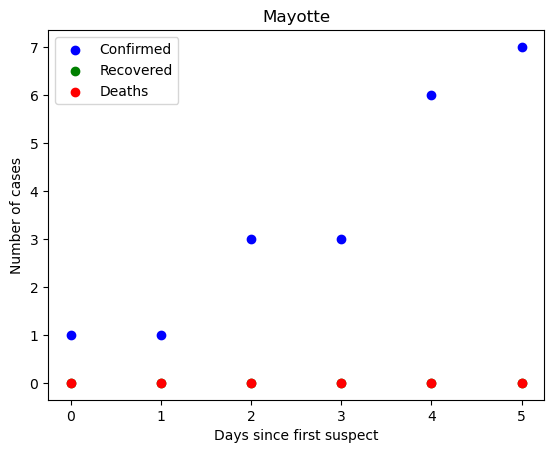

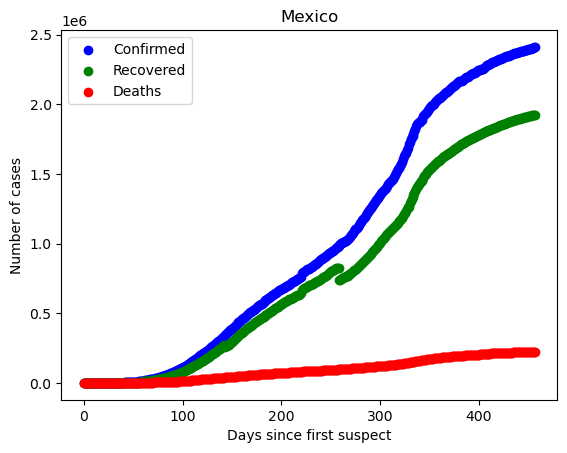

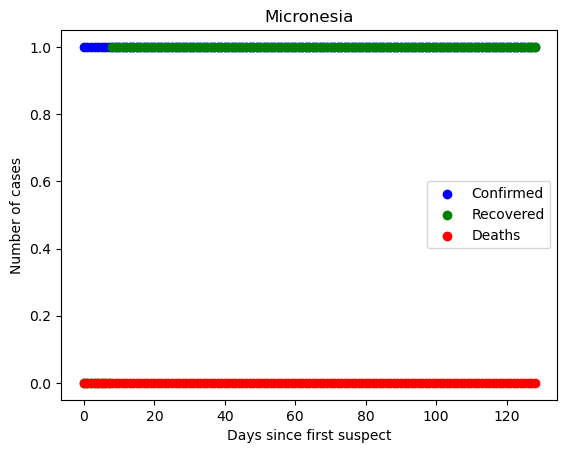

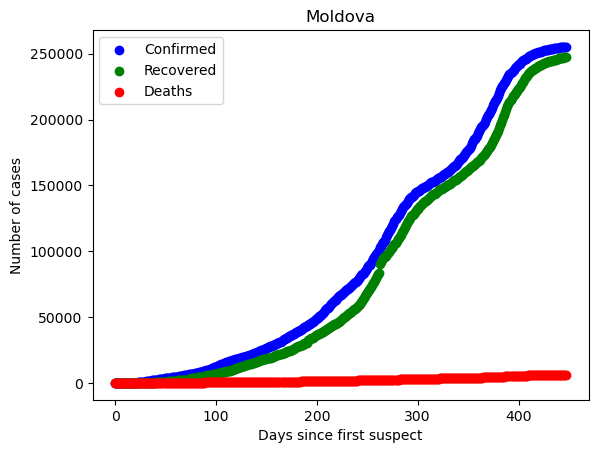

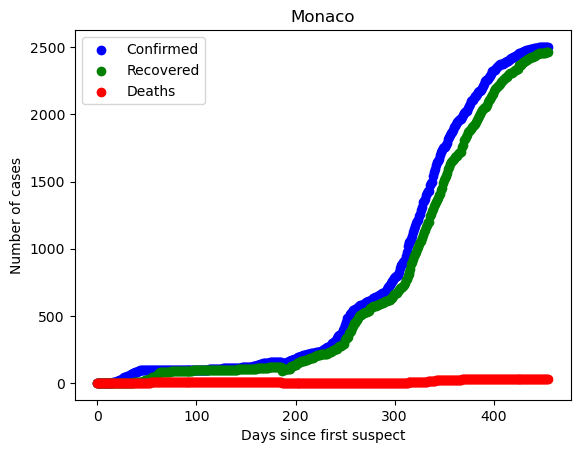

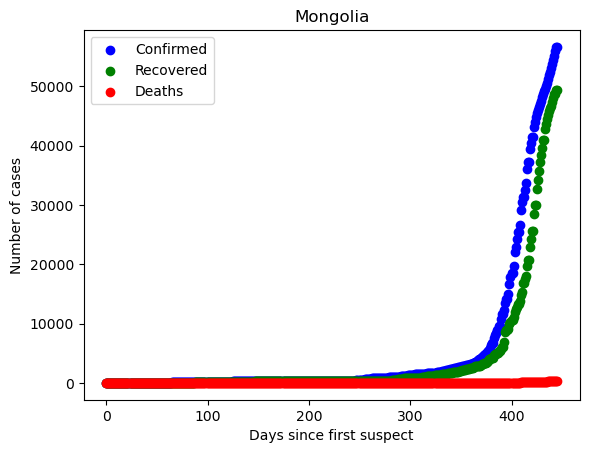

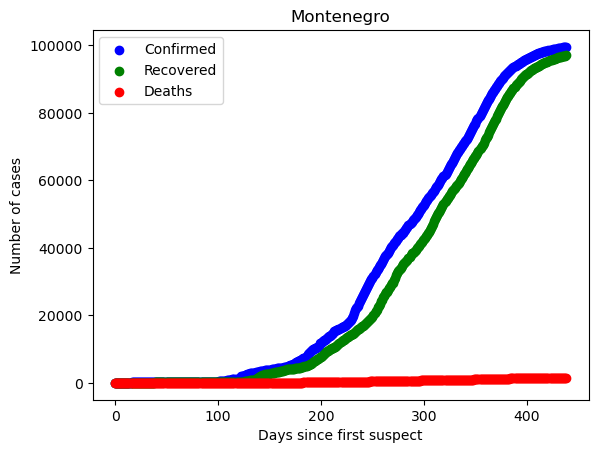

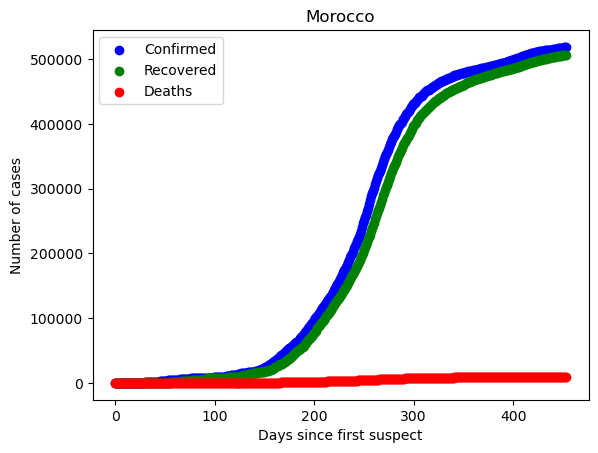

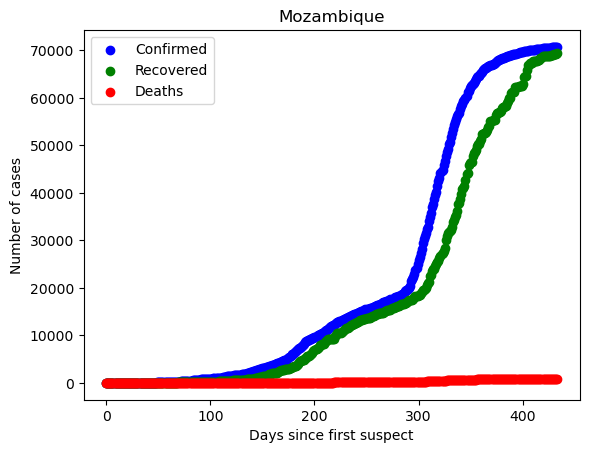

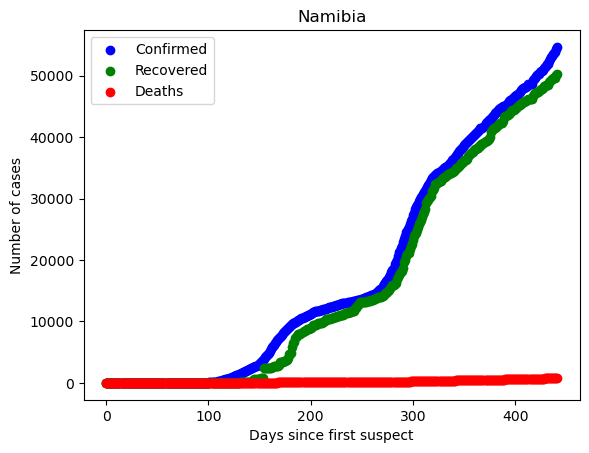

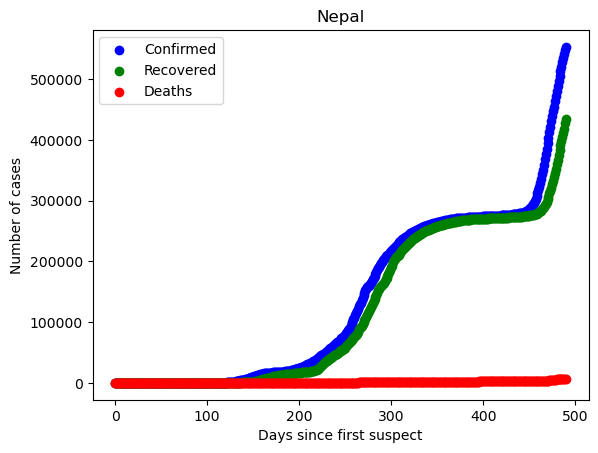

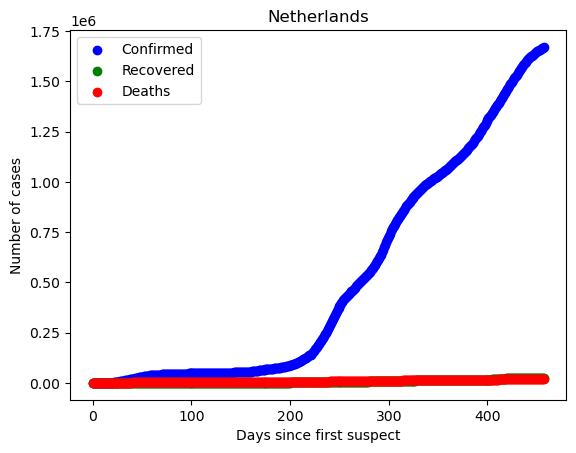

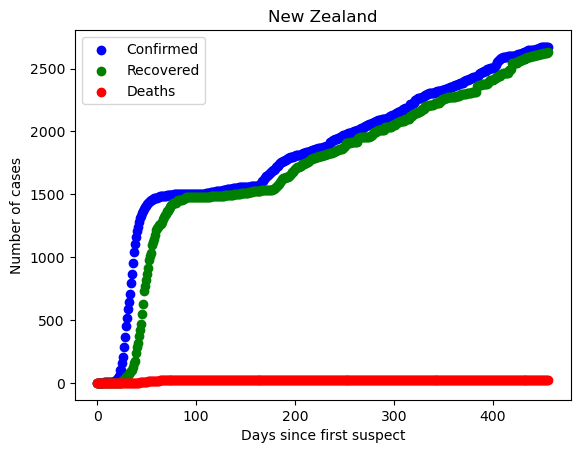

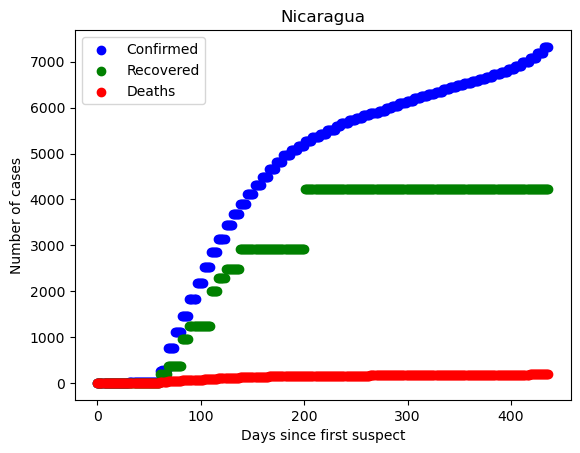

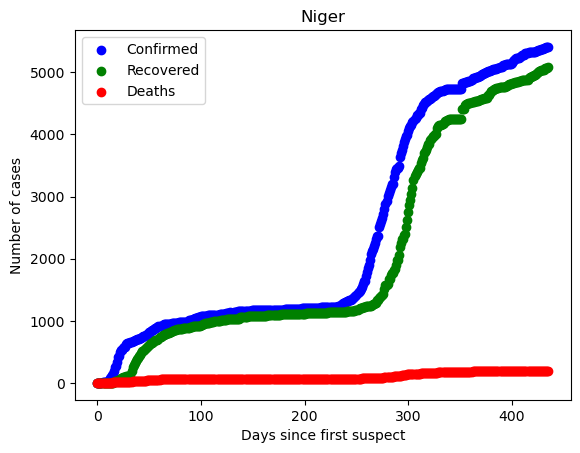

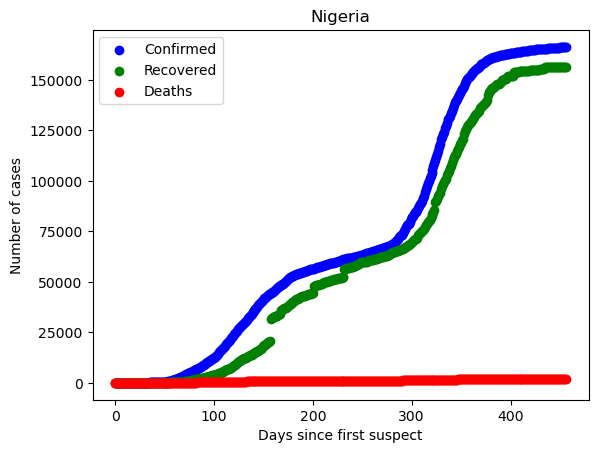

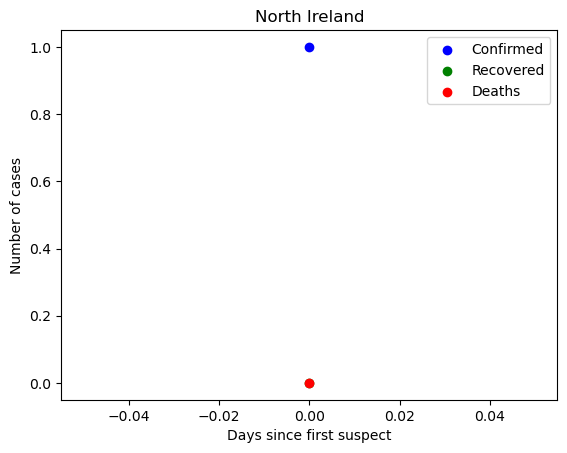

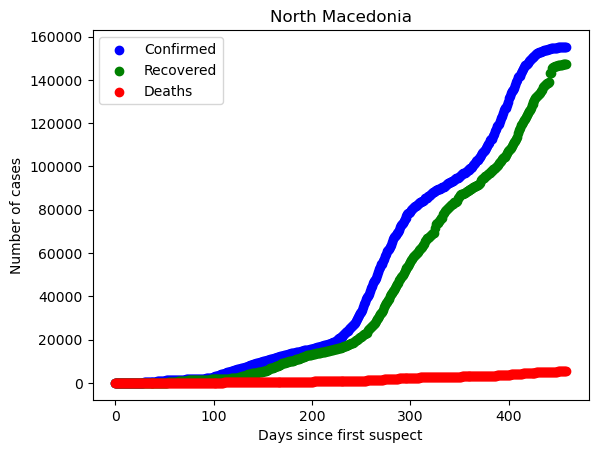

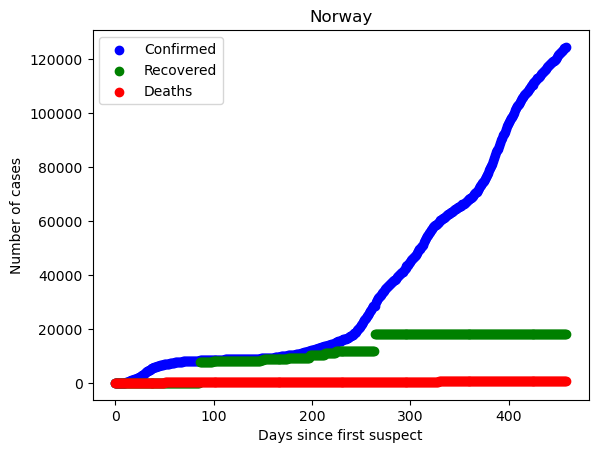

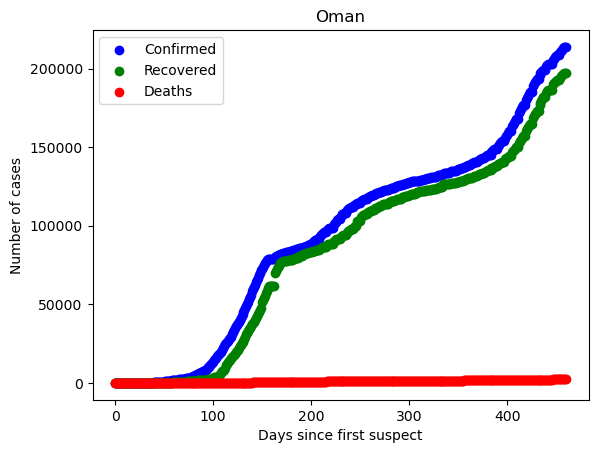

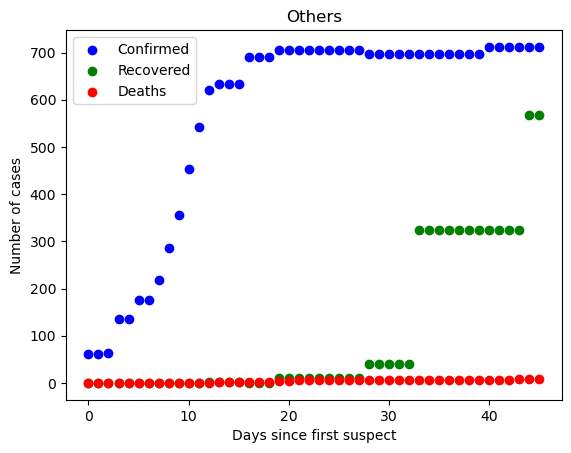

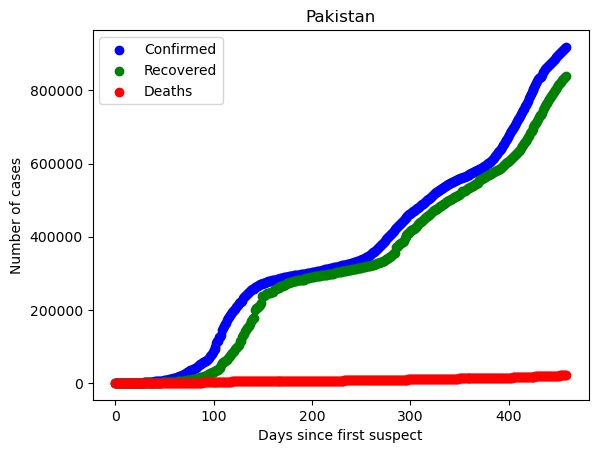

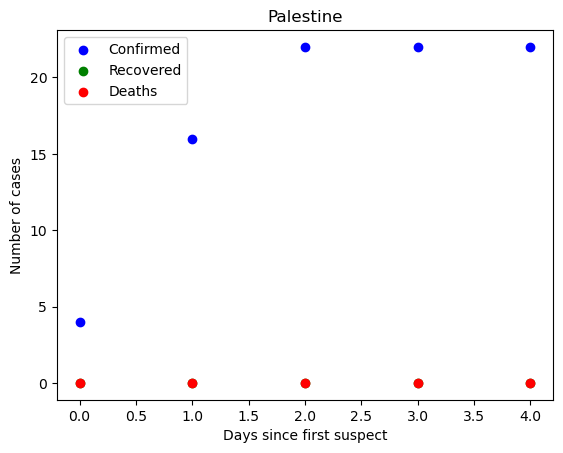

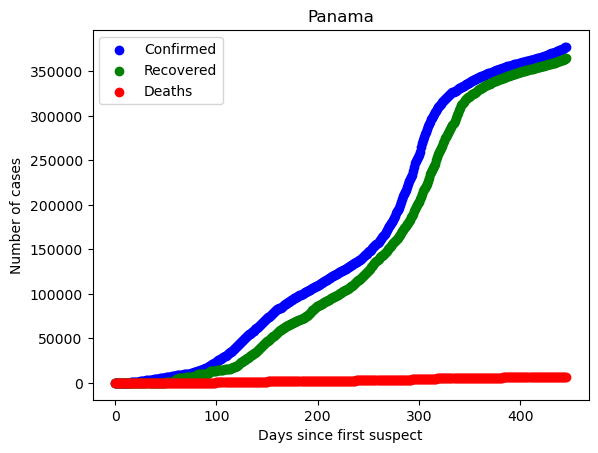

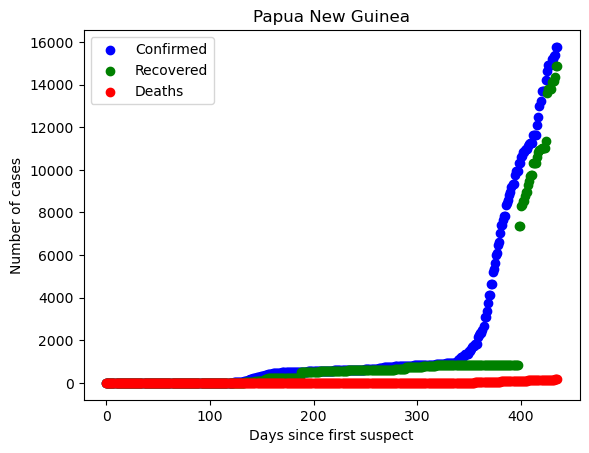

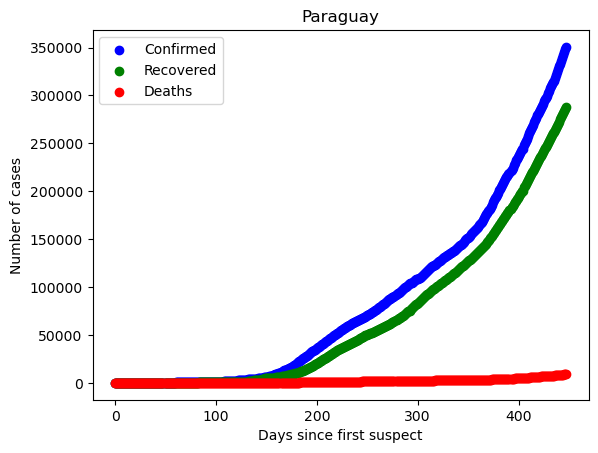

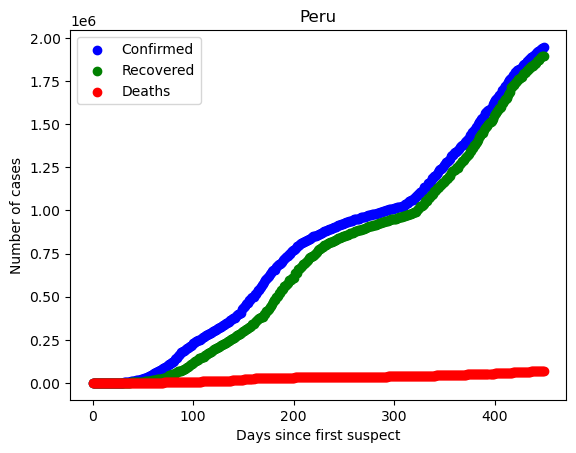

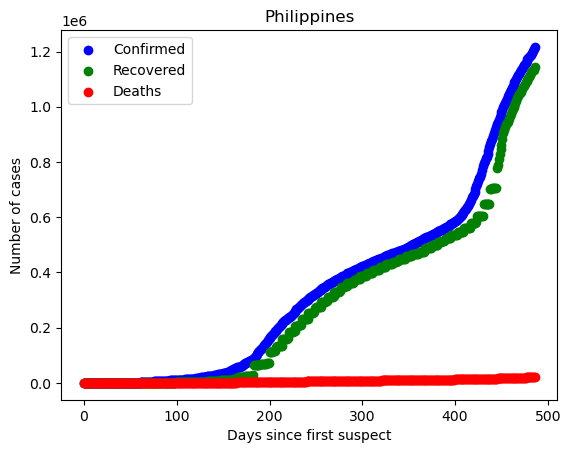

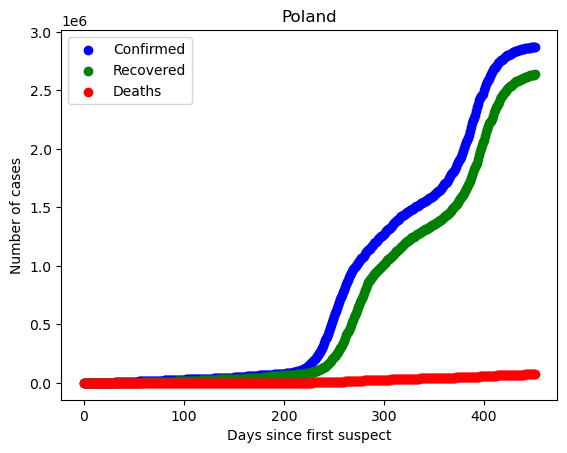

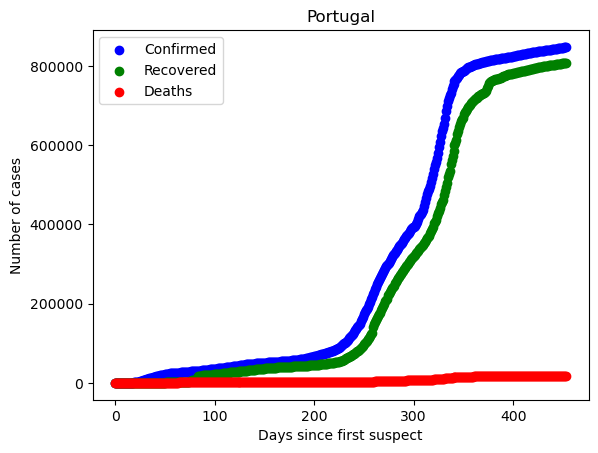

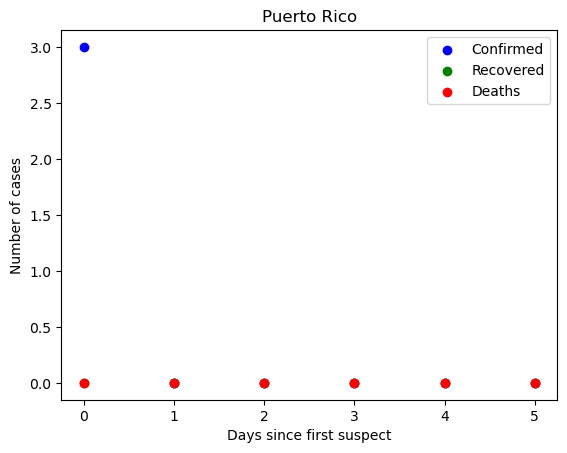

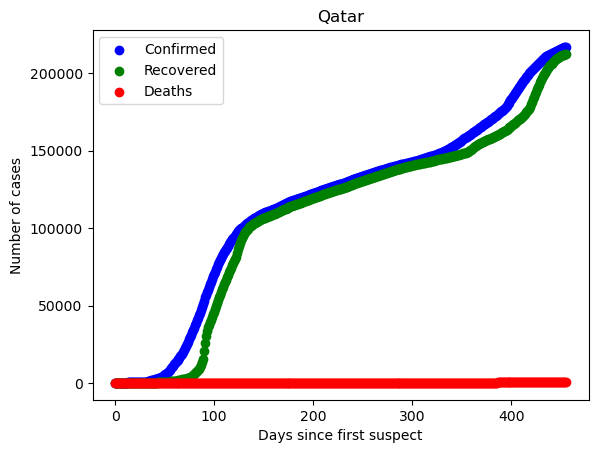

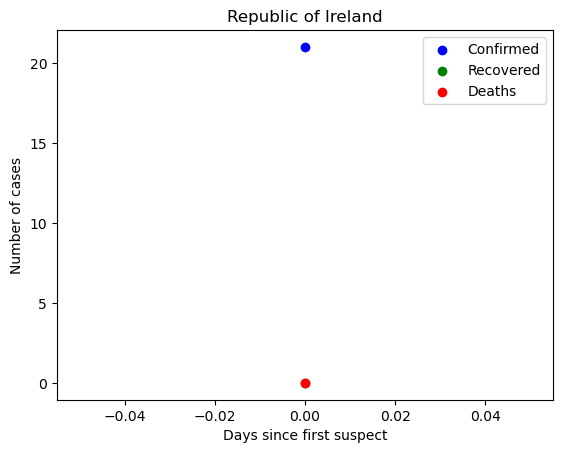

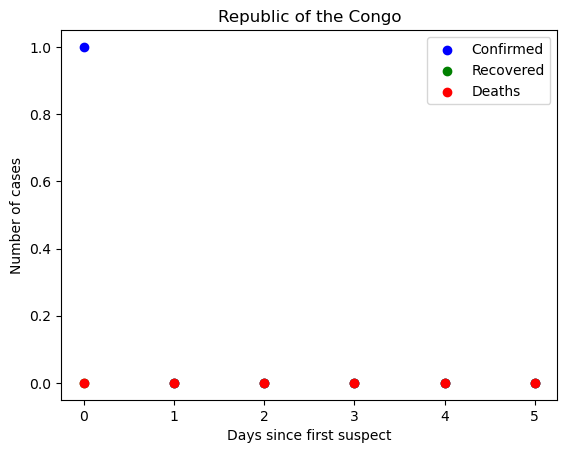

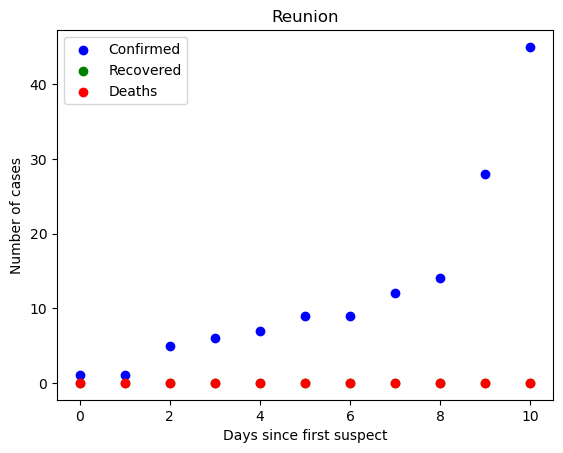

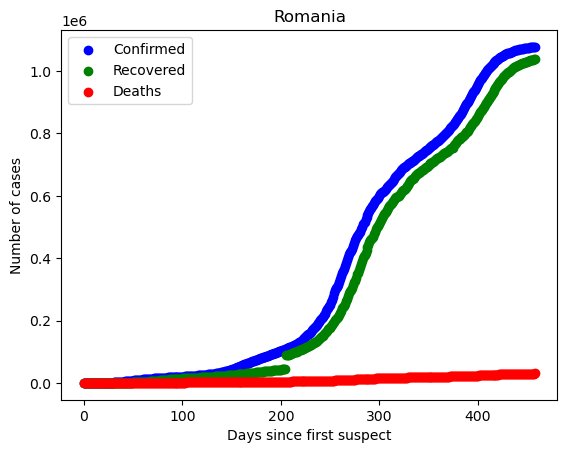

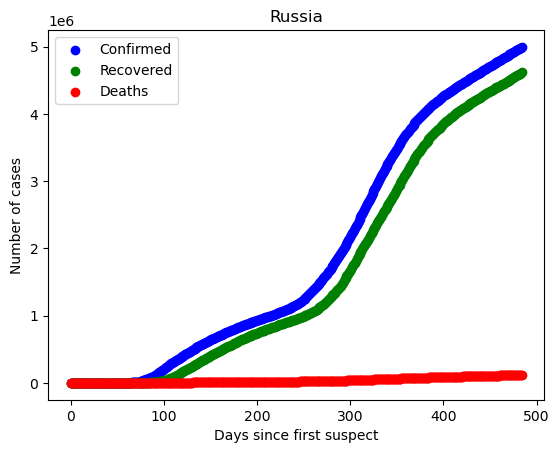

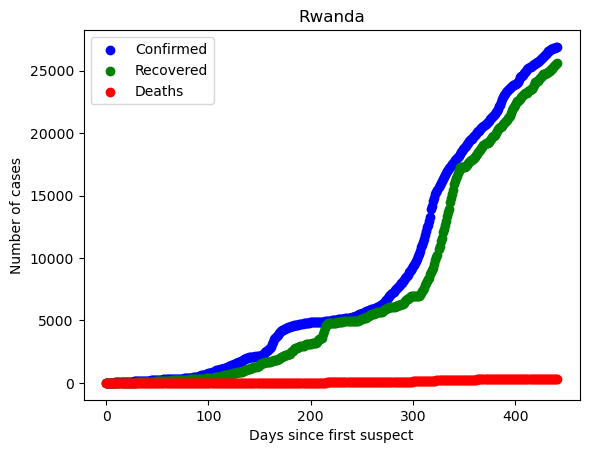

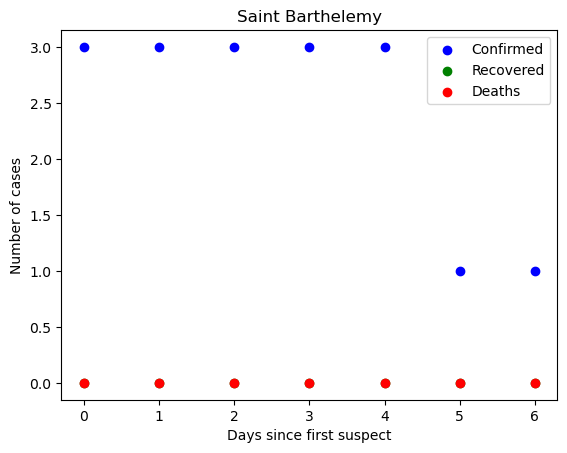

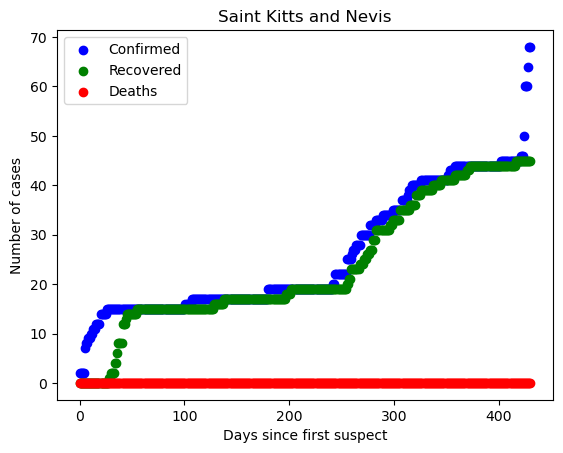

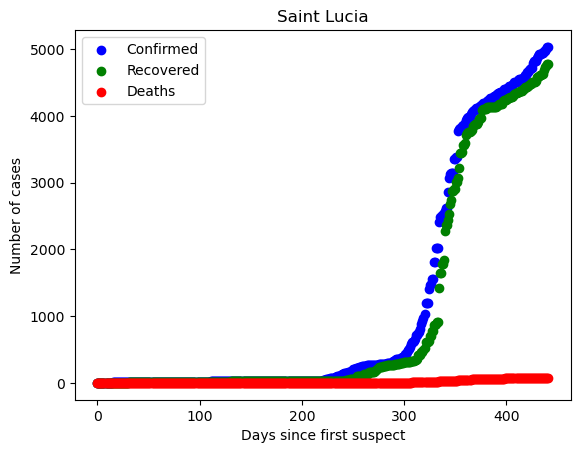

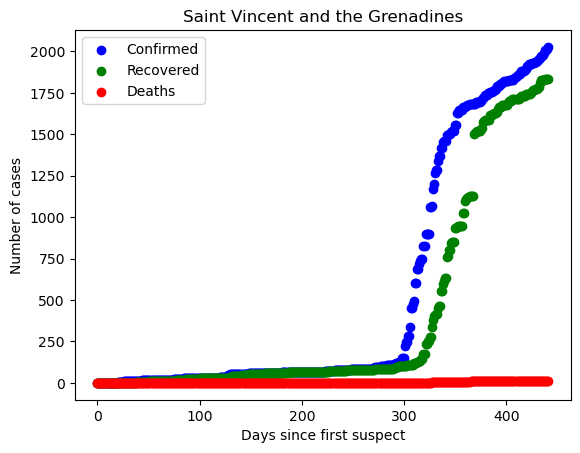

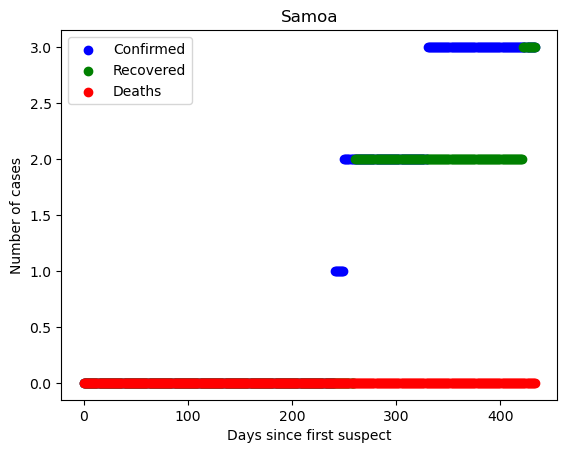

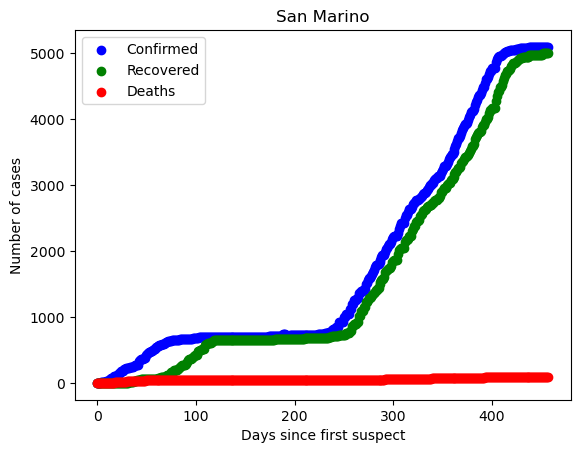

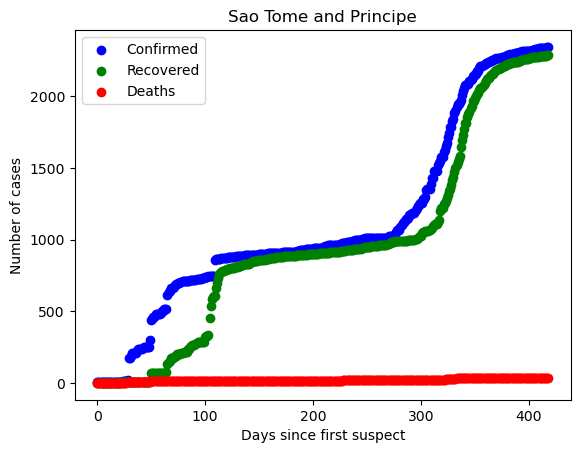

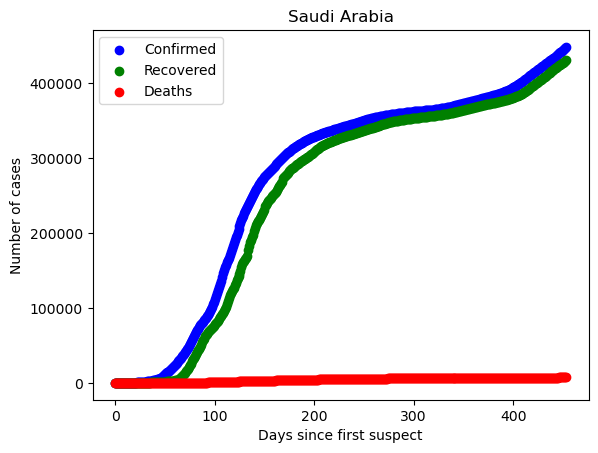

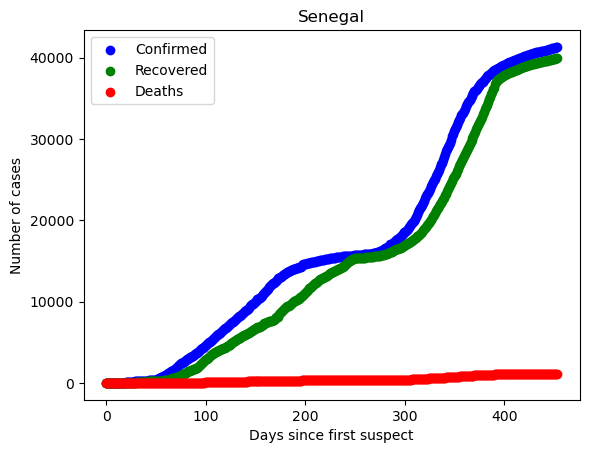

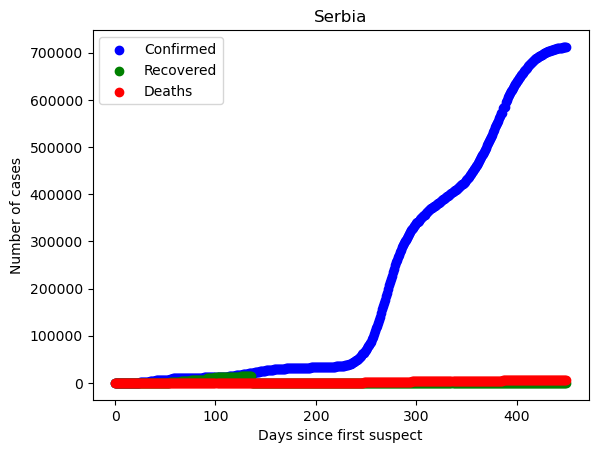

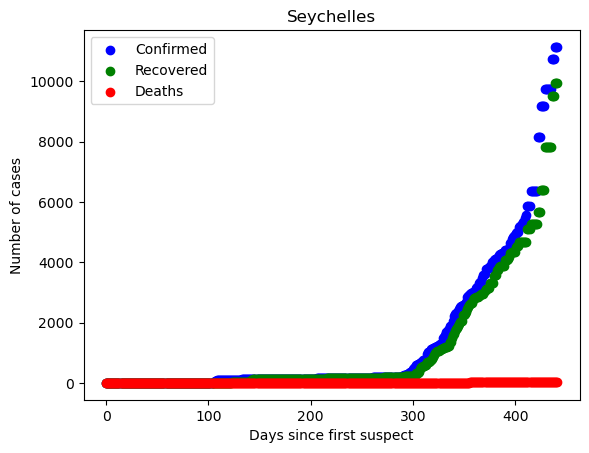

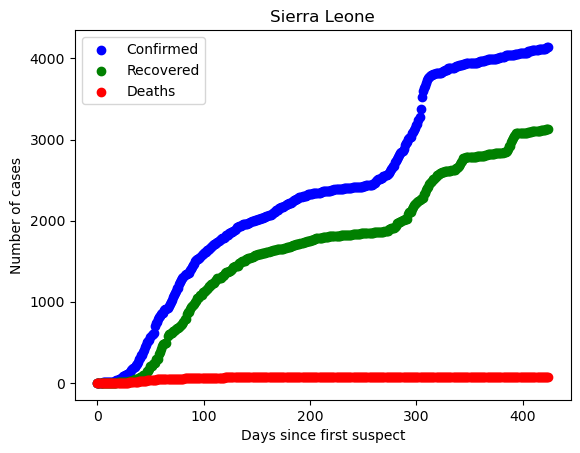

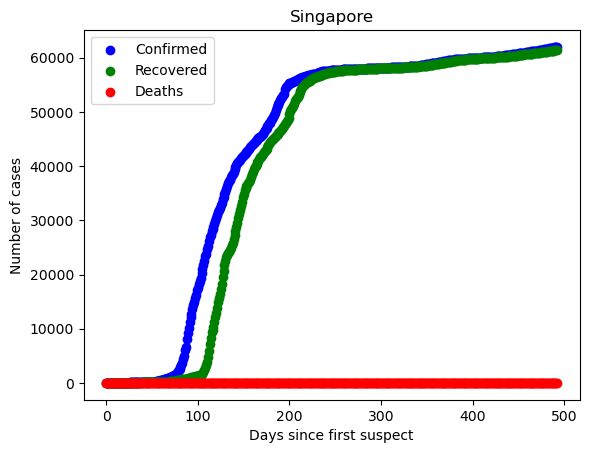

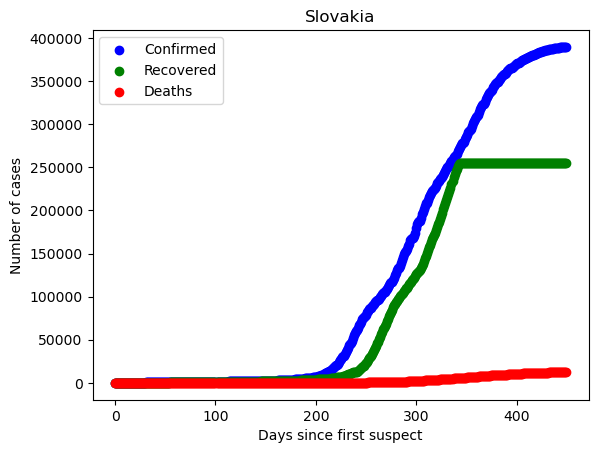

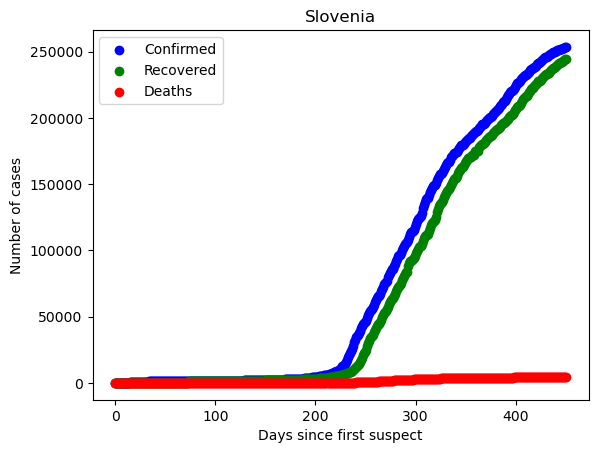

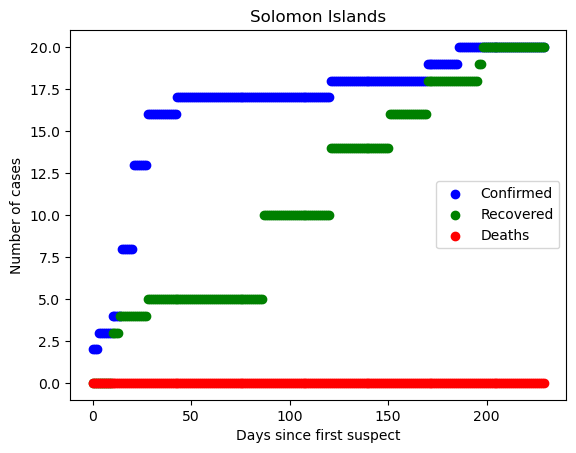

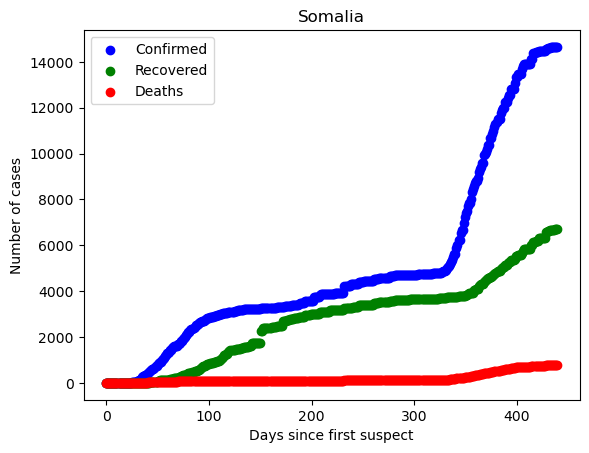

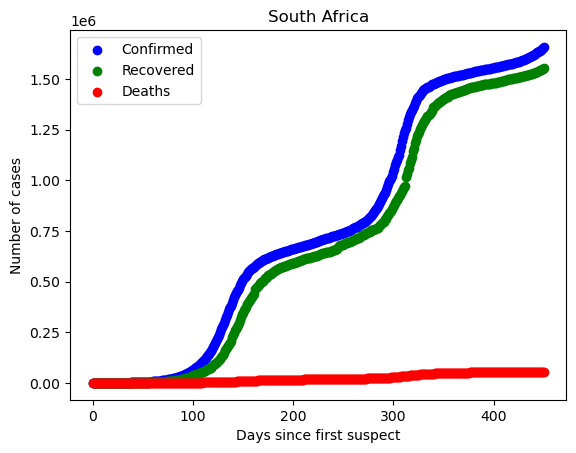

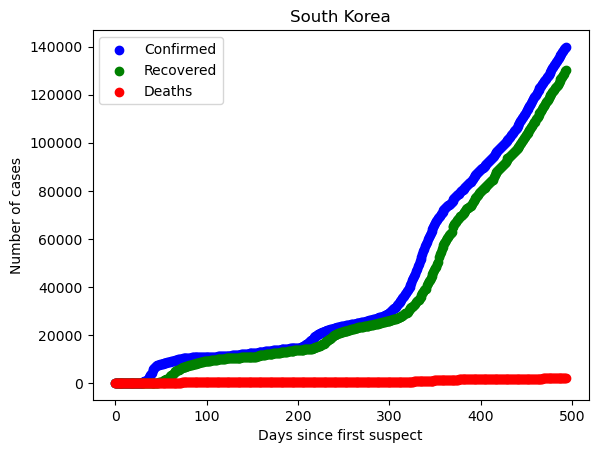

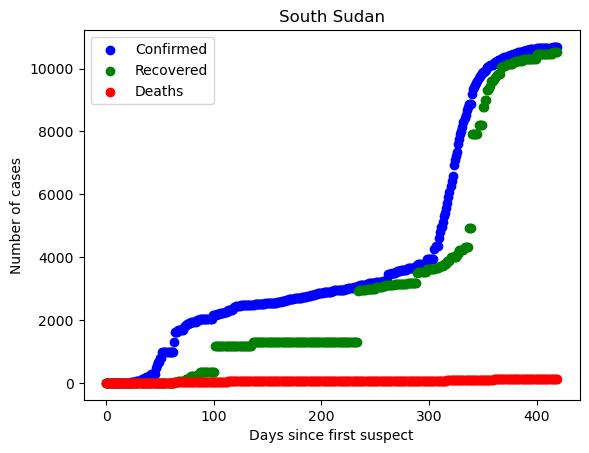

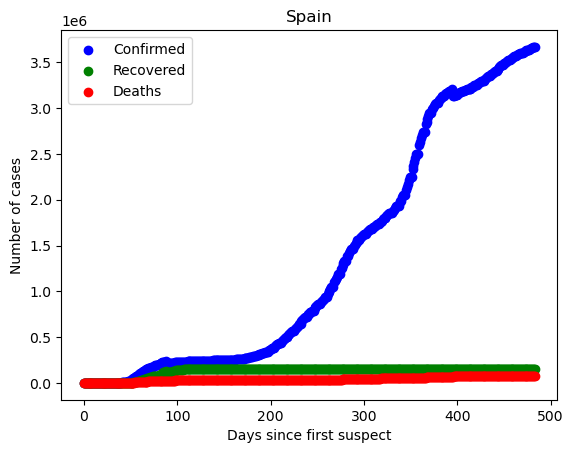

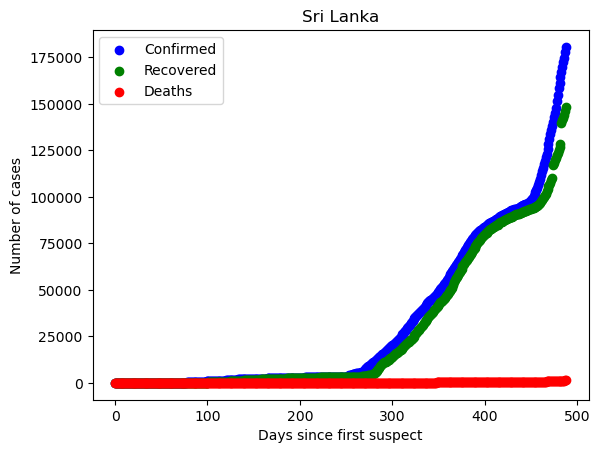

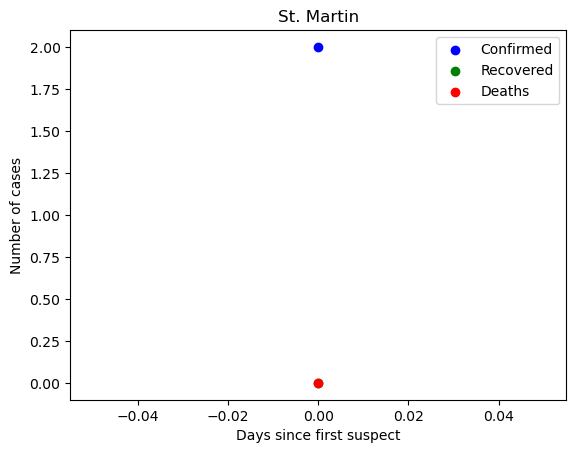

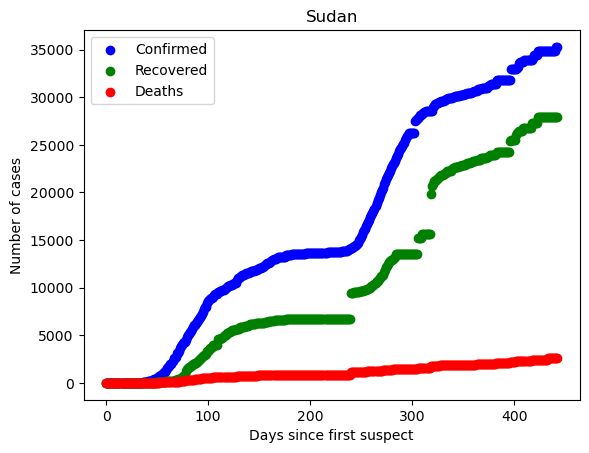

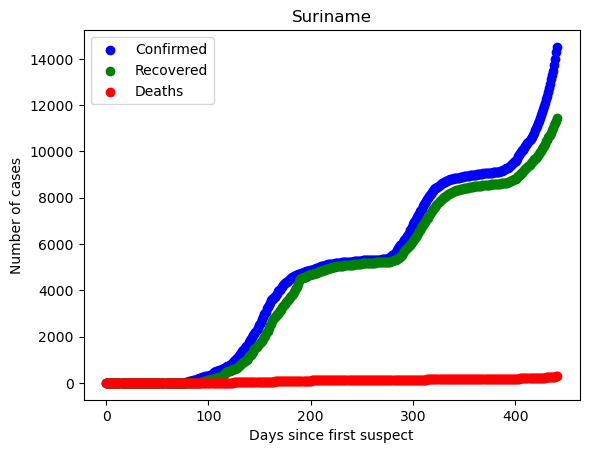

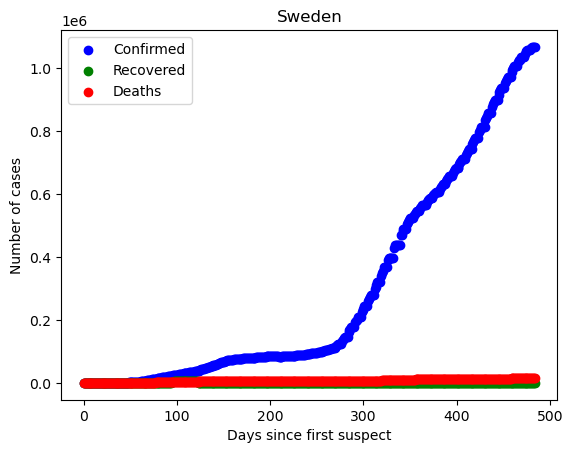

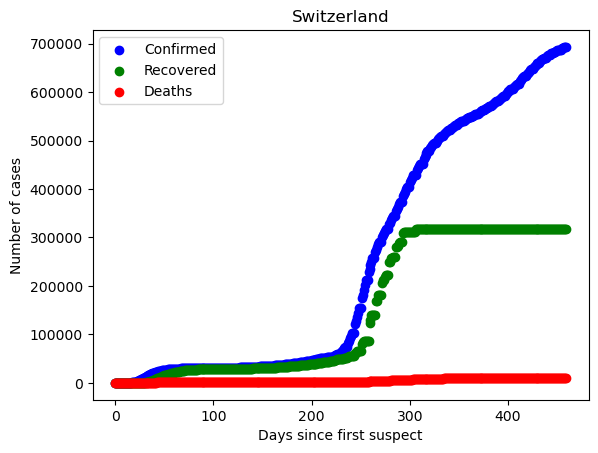

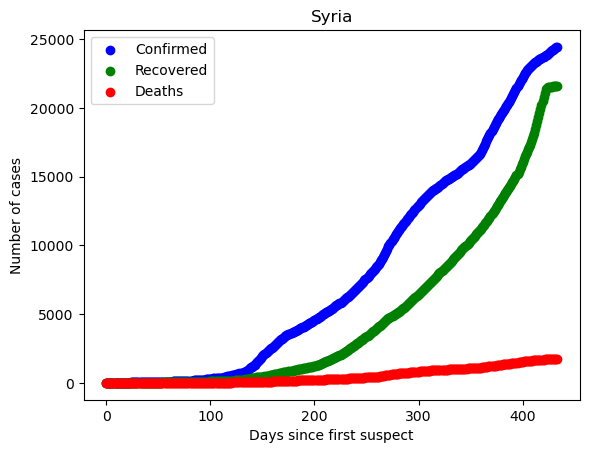

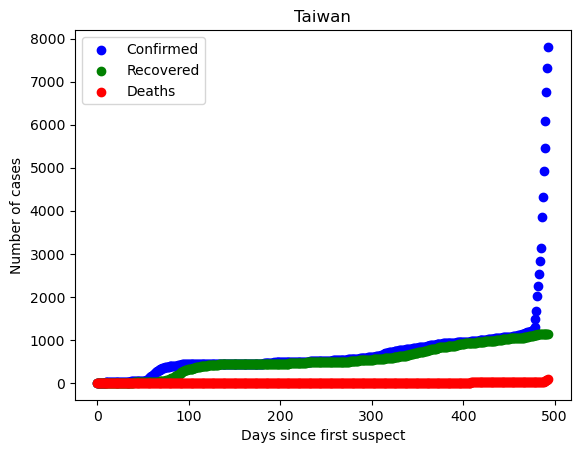

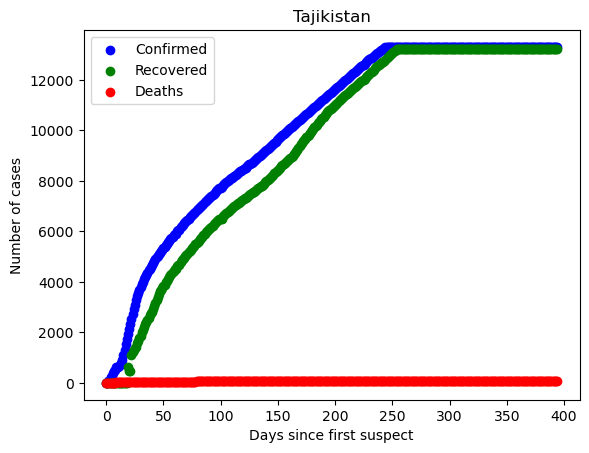

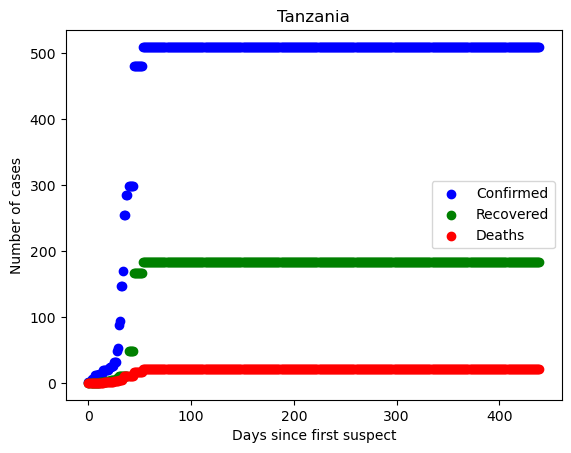

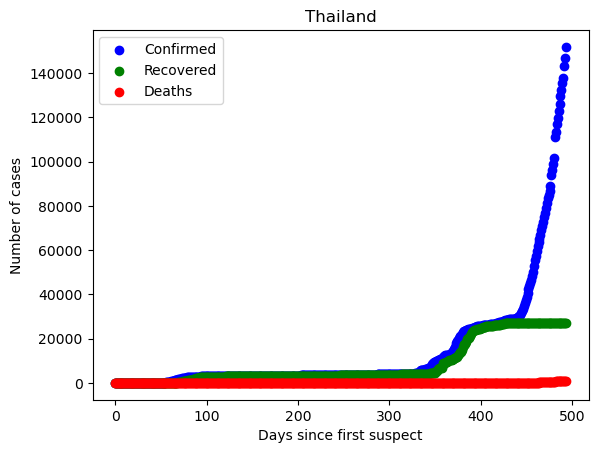

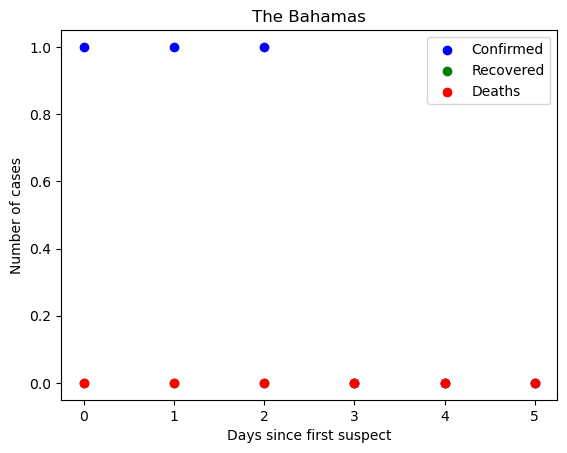

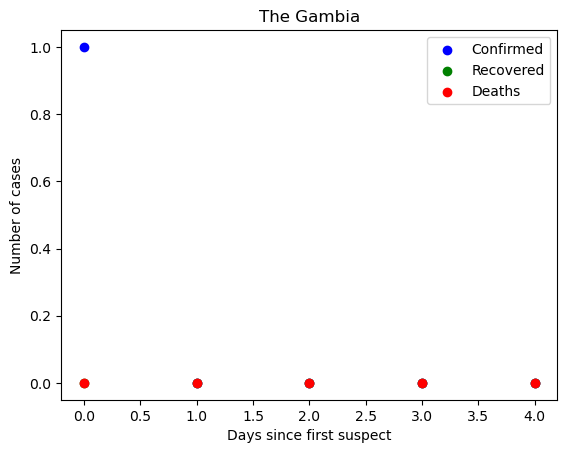

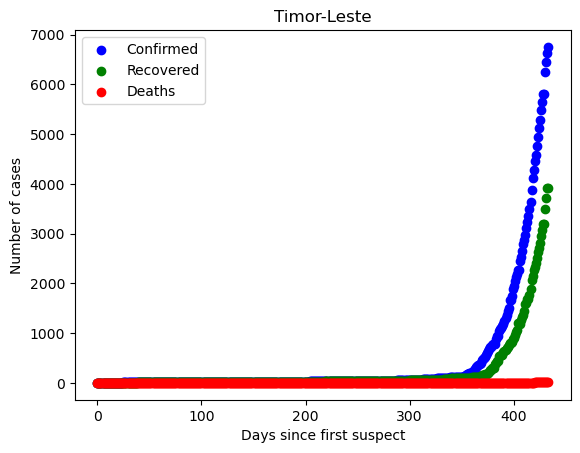

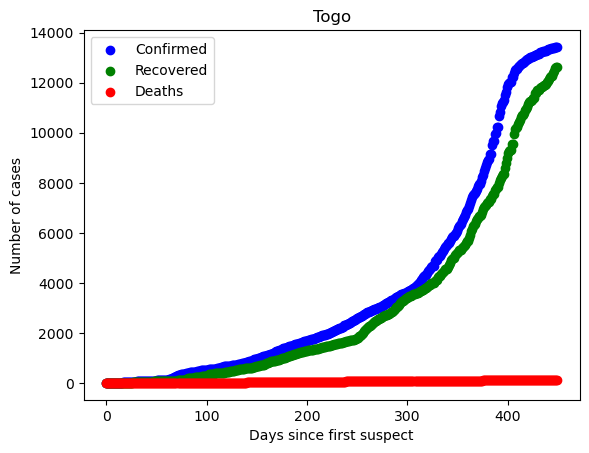

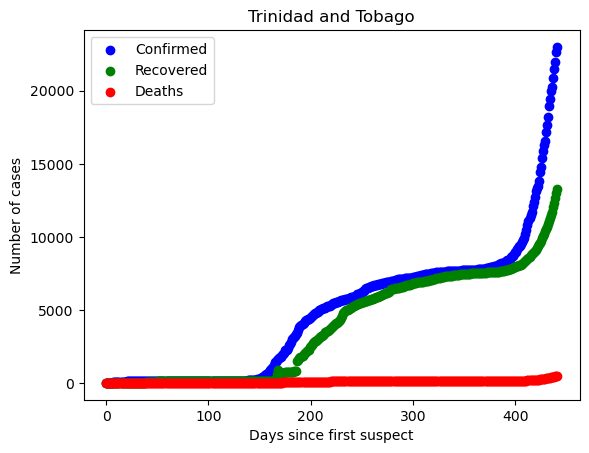

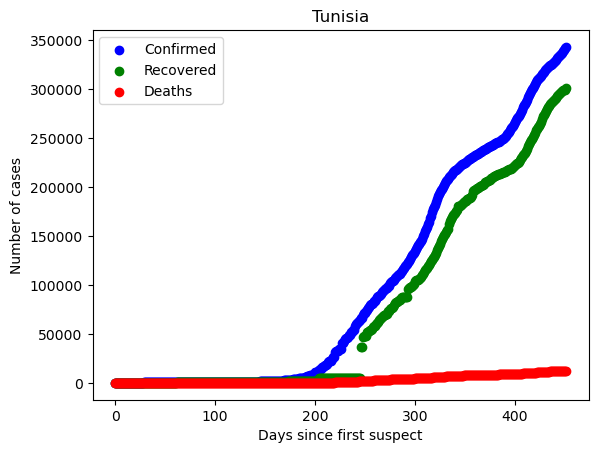

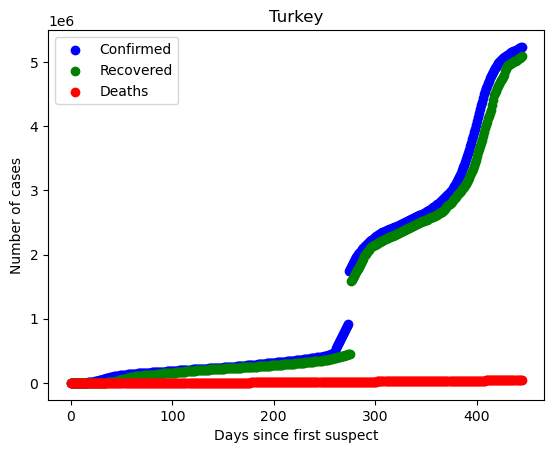

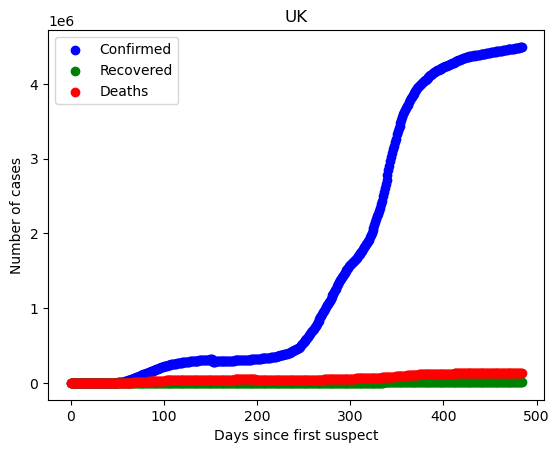

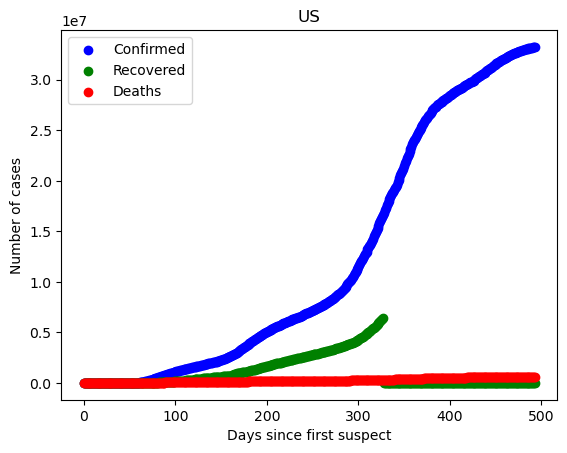

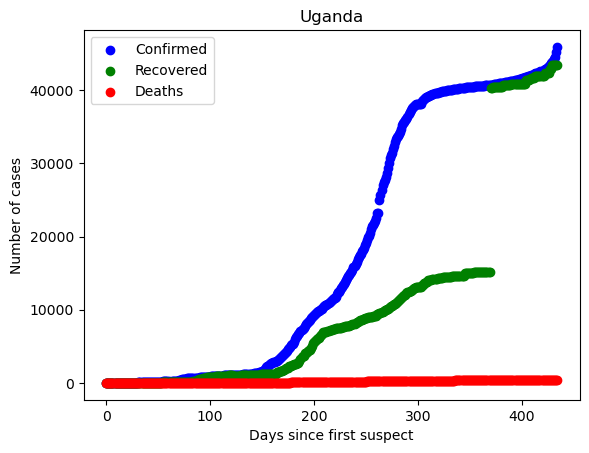

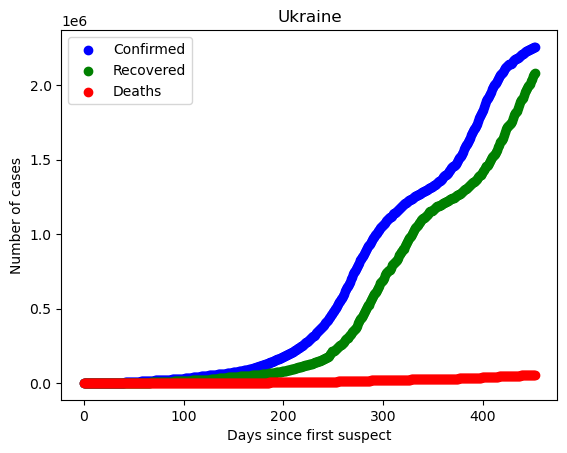

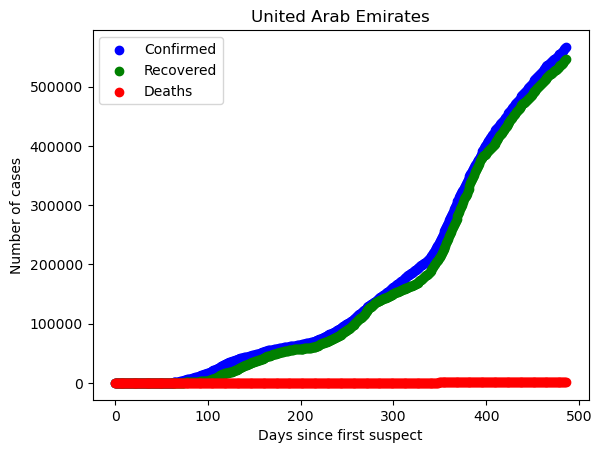

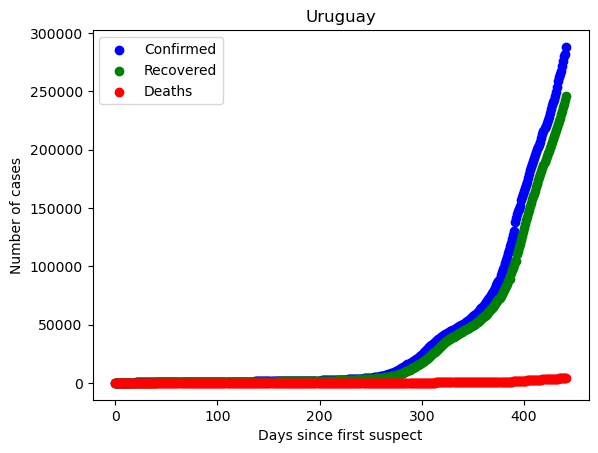

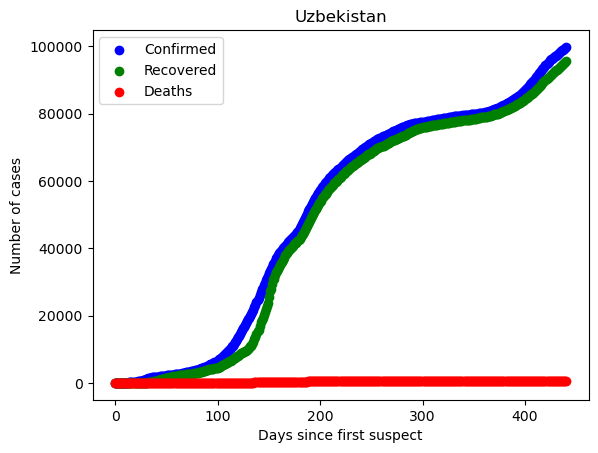

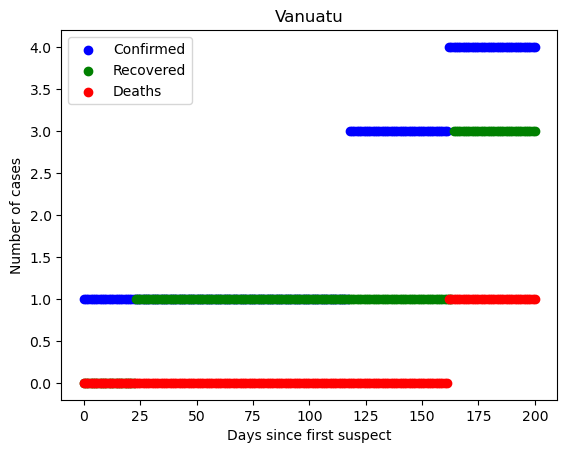

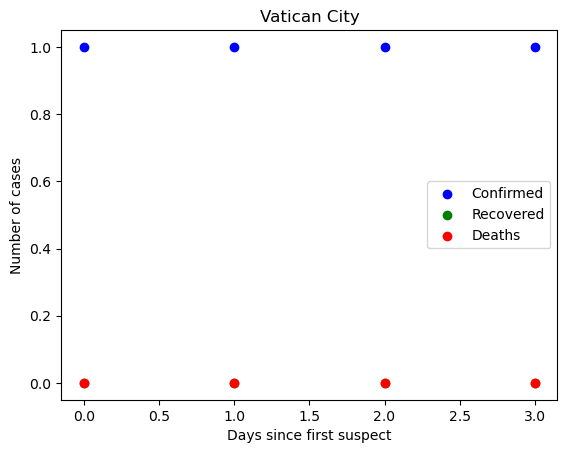

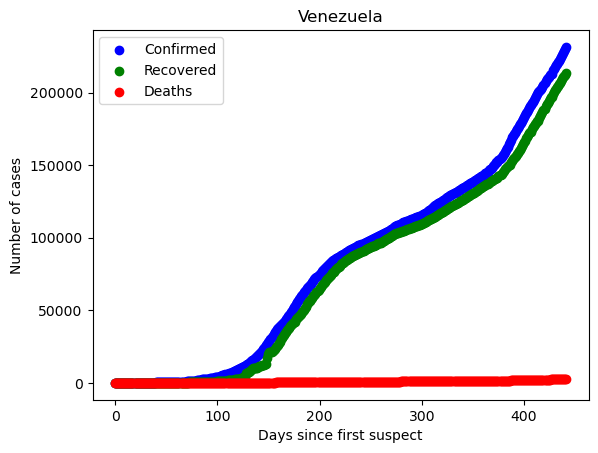

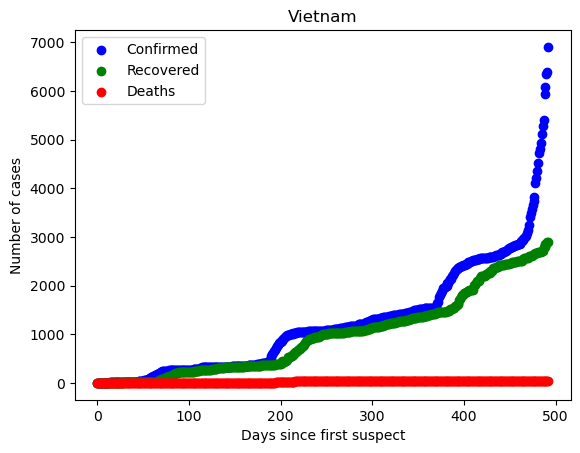

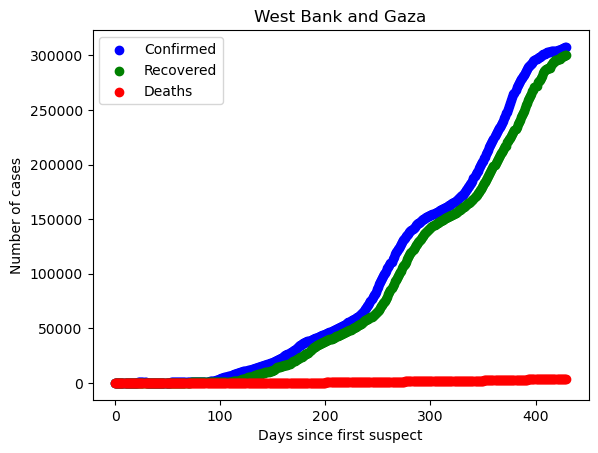

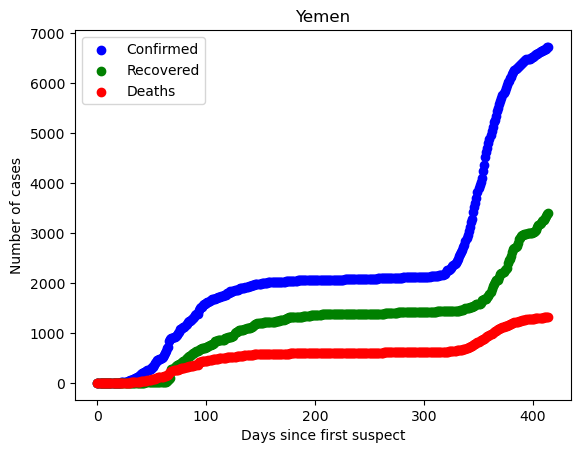

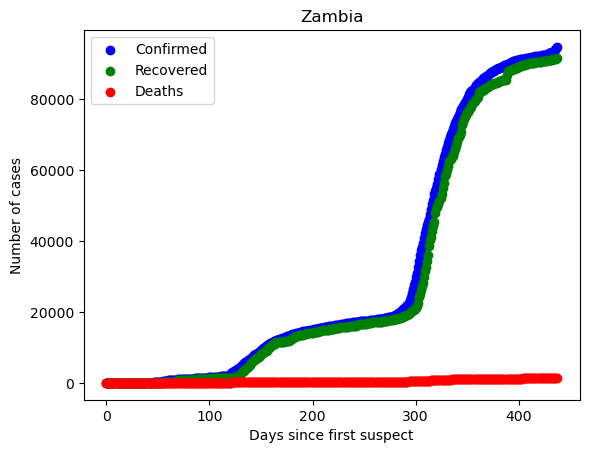

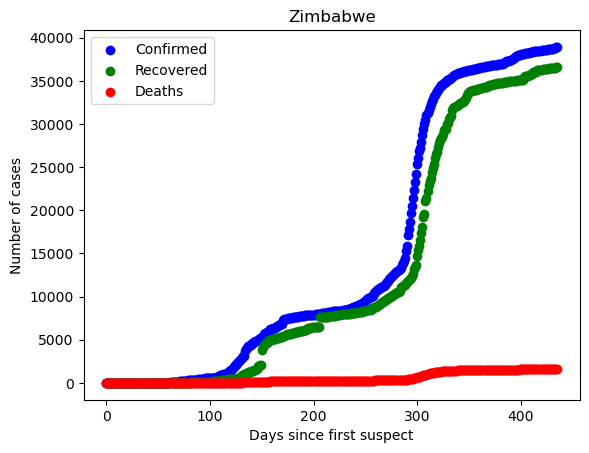

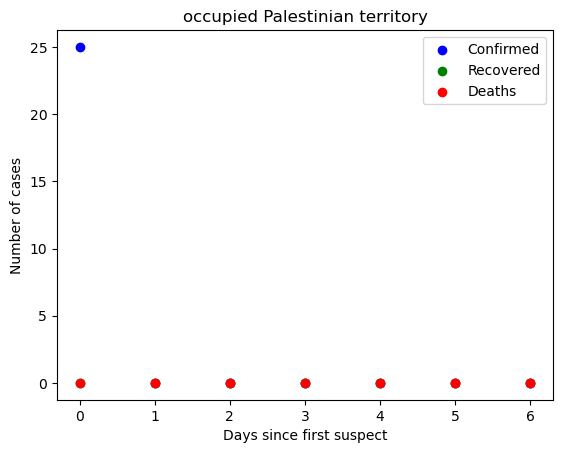

In [30]:
for idx in range(0, len(countries)):
    c = df3[df3['Country'] == countries[idx]].reset_index()
    plt.scatter(np.arange(0, len(c)), c['Confirmed'], color = 'blue', label = 'Confirmed')
    plt.scatter(np.arange(0, len(c)), c['Recovered'], color = 'green', label = 'Recovered')
    plt.scatter(np.arange(0, len(c)), c['Deaths'], color = 'red', label = 'Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()

In [31]:
df4 = df3.groupby(['Date'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [32]:
df4

Date  Confirmed   Deaths  Recovered
0   2020-01-22        557       17         30
1   2020-01-23       1097       34         60
2   2020-01-24        941       26         39
3   2020-01-25       1437       42         42
4   2020-01-26       2118       56         56
..         ...        ...      ...        ...
489 2021-05-25  167848207  3485788  104824935
490 2021-05-26  168416423  3498544  105380748
491 2021-05-27  168970791  3511297  106078106
492 2021-05-28  169470725  3523117  106633069
493 2021-05-29  169951560  3533619  107140669

[494 rows x 4 columns]

In [35]:
d = df4

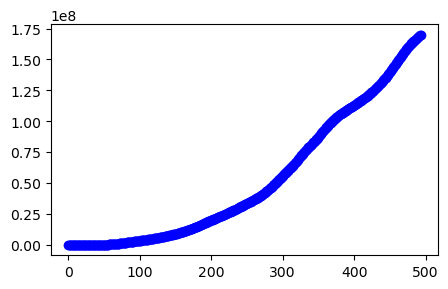

In [40]:
plt.figure(figsize=(5,3))
plt.scatter(np.arange(0, len(d)), d['Confirmed'], color = 'blue', label = 'Confirmed')

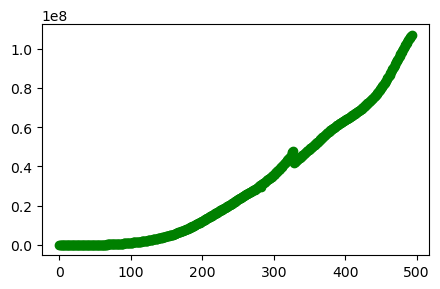

In [41]:
plt.figure(figsize=(5,3))
plt.scatter(np.arange(0, len(d)), d['Recovered'], color = 'green', label = 'Recovered')

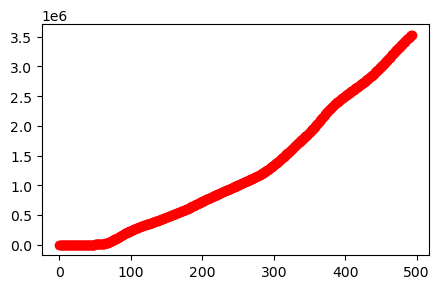

In [42]:
plt.figure(figsize=(5,3))
plt.scatter(np.arange(0, len(d)), d['Deaths'], color = 'red', label = 'Deaths')

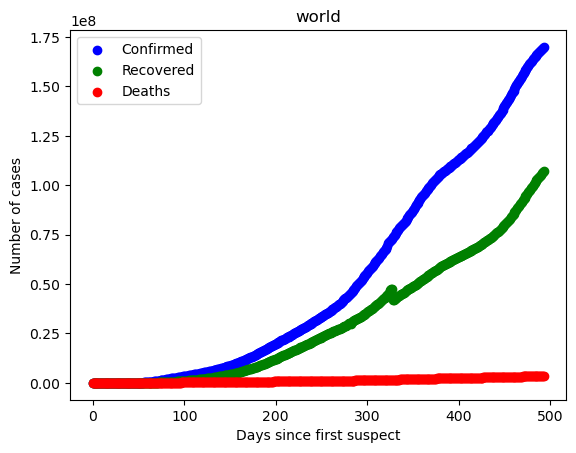

In [58]:
plt.scatter(np.arange(0, len(d)), d['Confirmed'], color = 'blue', label = 'Confirmed')
plt.scatter(np.arange(0, len(d)), d['Recovered'], color = 'green', label = 'Recovered')
plt.scatter(np.arange(0, len(d)), d['Deaths'], color = 'red', label = 'Deaths')
plt.title('world')
plt.xlabel('Days since first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()